# Importing libraries and data reading

In [1]:
import joblib
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Cleaning

In [2]:
data = pd.read_csv("dataset/data_science_competition_2024.csv")

### Data Exploration

In [3]:
data.shape

(100000, 21)

In [4]:
data.head(10)

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,...,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,...,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,...,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,...,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,...,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default
5,5,3595fbe4-397c-42b1-aeb2-f85a6cdf4ee3,other,2020 11 15,USD,Zimbabwe,other,True,Data Analyst,Chimanimani,...,0,37778.075179,0.21,46,0,44,2633.653709,single,46,Did not default
6,6,a6255398-b8c6-494c-b7ff-3d7fee6703d5,male,2023 11 09,USD,Zimbabwe,male,True,Teacher,Harare,...,0,28675.968452,0.22,47,0,52,2554.371003,single,47,Did not default
7,7,b259ce87-a771-46ee-9785-b0a9f5dab2d6,female,2021 03 18,USD,Zimbabwe,female,True,Data Analyst,Marondera,...,1,38406.933711,0.22,39,1,46,2847.991485,married,39,Did not default
8,8,5f7444d0-76c9-4902-8a97-a1d134101100,other,2020 04 04,USD,Zimbabwe,other,True,Nurse,Kadoma,...,0,28015.543801,0.22,46,0,47,2521.387875,married,46,Did not default
9,9,12fb64f7-8101-4868-a2fe-83178bbaebce,male,2020 12 03,USD,Zimbabwe,male,True,Nurse,Marondera,...,1,61800.467639,0.24,37,1,43,2799.437570,divorced,37,Did not default


##### Removing unnamed: 0, loan_id, gender
* unnamed is a duplicate of the index column and should be dropped
* loan_id is a unique identify so the model may overfit to the specific load ID's
* gender and sex have the same value so iam going to drop gender column

In [5]:
data.drop(columns=["Unnamed: 0", "gender", "loan_id"], inplace=True)
data.head()

,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   disbursemet_date      100000 non-null  object 
 1   currency              100000 non-null  object 
 2   country               99900 non-null   object 
 3   sex                   100000 non-null  object 
 4   is_employed           100000 non-null  bool   
 5   job                   95864 non-null   object 
 6   location              99405 non-null   object 
 7   loan_amount           100000 non-null  float64
 8   number_of_defaults    100000 non-null  int64  
 9   outstanding_balance   100000 non-null  float64
 10  interest_rate         100000 non-null  float64
 11  age                   100000 non-null  int64  
 12  number_of_defaults.1  100000 non-null  int64  
 13  remaining term        100000 non-null  object 
 14  salary                100000 non-null  float64
 15  m

In [7]:
data.describe()

,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,salary,age.1
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000
mean,31120.000000,0.441970,36964.909763,0.210435,43.57069,0.441970,2781.804324,43.57069
std,15895.093631,0.688286,10014.758477,0.018725,4.86376,0.688286,696.450055,4.86376
min,1000.000000,0.000000,0.000000,0.100000,21.00000,0.000000,250.000000,21.00000
25%,21000.000000,0.000000,29625.227472,0.200000,40.00000,0.000000,2273.929349,40.00000
50%,31000.000000,0.000000,35063.852394,0.210000,44.00000,0.000000,2665.441567,44.00000
75%,40000.000000,1.000000,42133.388817,0.220000,47.00000,1.000000,3146.577655,47.00000
max,273000.000000,2.000000,150960.000000,0.300000,65.00000,2.000000,10000.000000,65.00000


## Comments

1. **Redundant Columns**
   - The dataset contains duplicates of the `number_of_defaults` and `age` columns.
   - **Action Required**: Data cleaning to remove these redundancies.

2. **Loan Amount and Outstanding Balance**
   - The `loan_amount` and `outstanding_balance` columns show a wide range of loan sizes and balances.
   - The median outstanding balance is slightly above the median loan amount.

3. **Interest Rate**
   - The `interest_rate` shows that most loans have an interest rate close to the mean of 21%, with little variation.

4. **Age Distribution**
   - The age distribution shows a concentration around the early 40s.
   - Most individuals are in their 40s.

5. **Salary**
   - The `salary` column indicates a wide range of salaries, with significant variation.
   - This highlights potential disparities among borrowers.

* Data cleaning and validation steps should be considered to address the redundant columns and ensure the accuracy of the dataset.

## Data preparation

In [8]:
data.columns

Index(['disbursemet_date', 'currency', 'country', 'sex', 'is_employed', 'job',
       'location', 'loan_amount', 'number_of_defaults', 'outstanding_balance',
       'interest_rate', 'age', 'number_of_defaults.1', 'remaining term',
       'salary', 'marital_status', 'age.1', 'Loan Status'],
      dtype='object')

In [9]:
# Renaming columns
data.rename(columns={'disbursemet_date': 'disbursement_date','number_of_defaults.1':'number_of_defaults', 'remaining term':'remaining_term',
                     'age.1':'age', 'Loan Status':'loan_status'}, inplace=True)
data.columns

Index(['disbursement_date', 'currency', 'country', 'sex', 'is_employed', 'job',
       'location', 'loan_amount', 'number_of_defaults', 'outstanding_balance',
       'interest_rate', 'age', 'number_of_defaults', 'remaining_term',
       'salary', 'marital_status', 'age', 'loan_status'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   disbursement_date    100000 non-null  object 
 1   currency             100000 non-null  object 
 2   country              99900 non-null   object 
 3   sex                  100000 non-null  object 
 4   is_employed          100000 non-null  bool   
 5   job                  95864 non-null   object 
 6   location             99405 non-null   object 
 7   loan_amount          100000 non-null  float64
 8   number_of_defaults   100000 non-null  int64  
 9   outstanding_balance  100000 non-null  float64
 10  interest_rate        100000 non-null  float64
 11  age                  100000 non-null  int64  
 12  number_of_defaults   100000 non-null  int64  
 13  remaining_term       100000 non-null  object 
 14  salary               100000 non-null  float64
 15  marital_status    

In [11]:
data['remaining_term'] = data['remaining_term'].str.strip('_-')

In [12]:
#Convert data  'disbursement_date', 
data["disbursement_date"] = pd.to_datetime(data["disbursement_date"])
data["remaining_term"] = pd.to_numeric(data["remaining_term"])

In [13]:
data.isna().sum()

disbursement_date         0
currency                  0
country                 100
sex                       0
is_employed               0
job                    4136
location                595
loan_amount               0
number_of_defaults        0
outstanding_balance       0
interest_rate             0
age                       0
number_of_defaults        0
remaining_term            0
salary                    0
marital_status            0
age                       0
loan_status               0
dtype: int64

In [14]:
#Feeling na values with most common value on the feature
data["country"] = data["country"].fillna(data["country"].mode()[0])
data["job"] = data["job"].fillna(data["job"].mode()[0])
data["location"] = data["location"].fillna(data["location"].mode()[0])

In [15]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

### Dealing with string features

In [16]:
import math

def plot_features(_features, _data):
    num_cols = 2  # Number of columns for subplots
    num_features = len(_features)
    num_rows = math.ceil(num_features / num_cols)  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize as needed

    for i, feature in enumerate(_features):
        row = i // num_cols
        col = i % num_cols

        _data[feature].value_counts().plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(f'Bar plot for {feature}')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()
    plt.show()

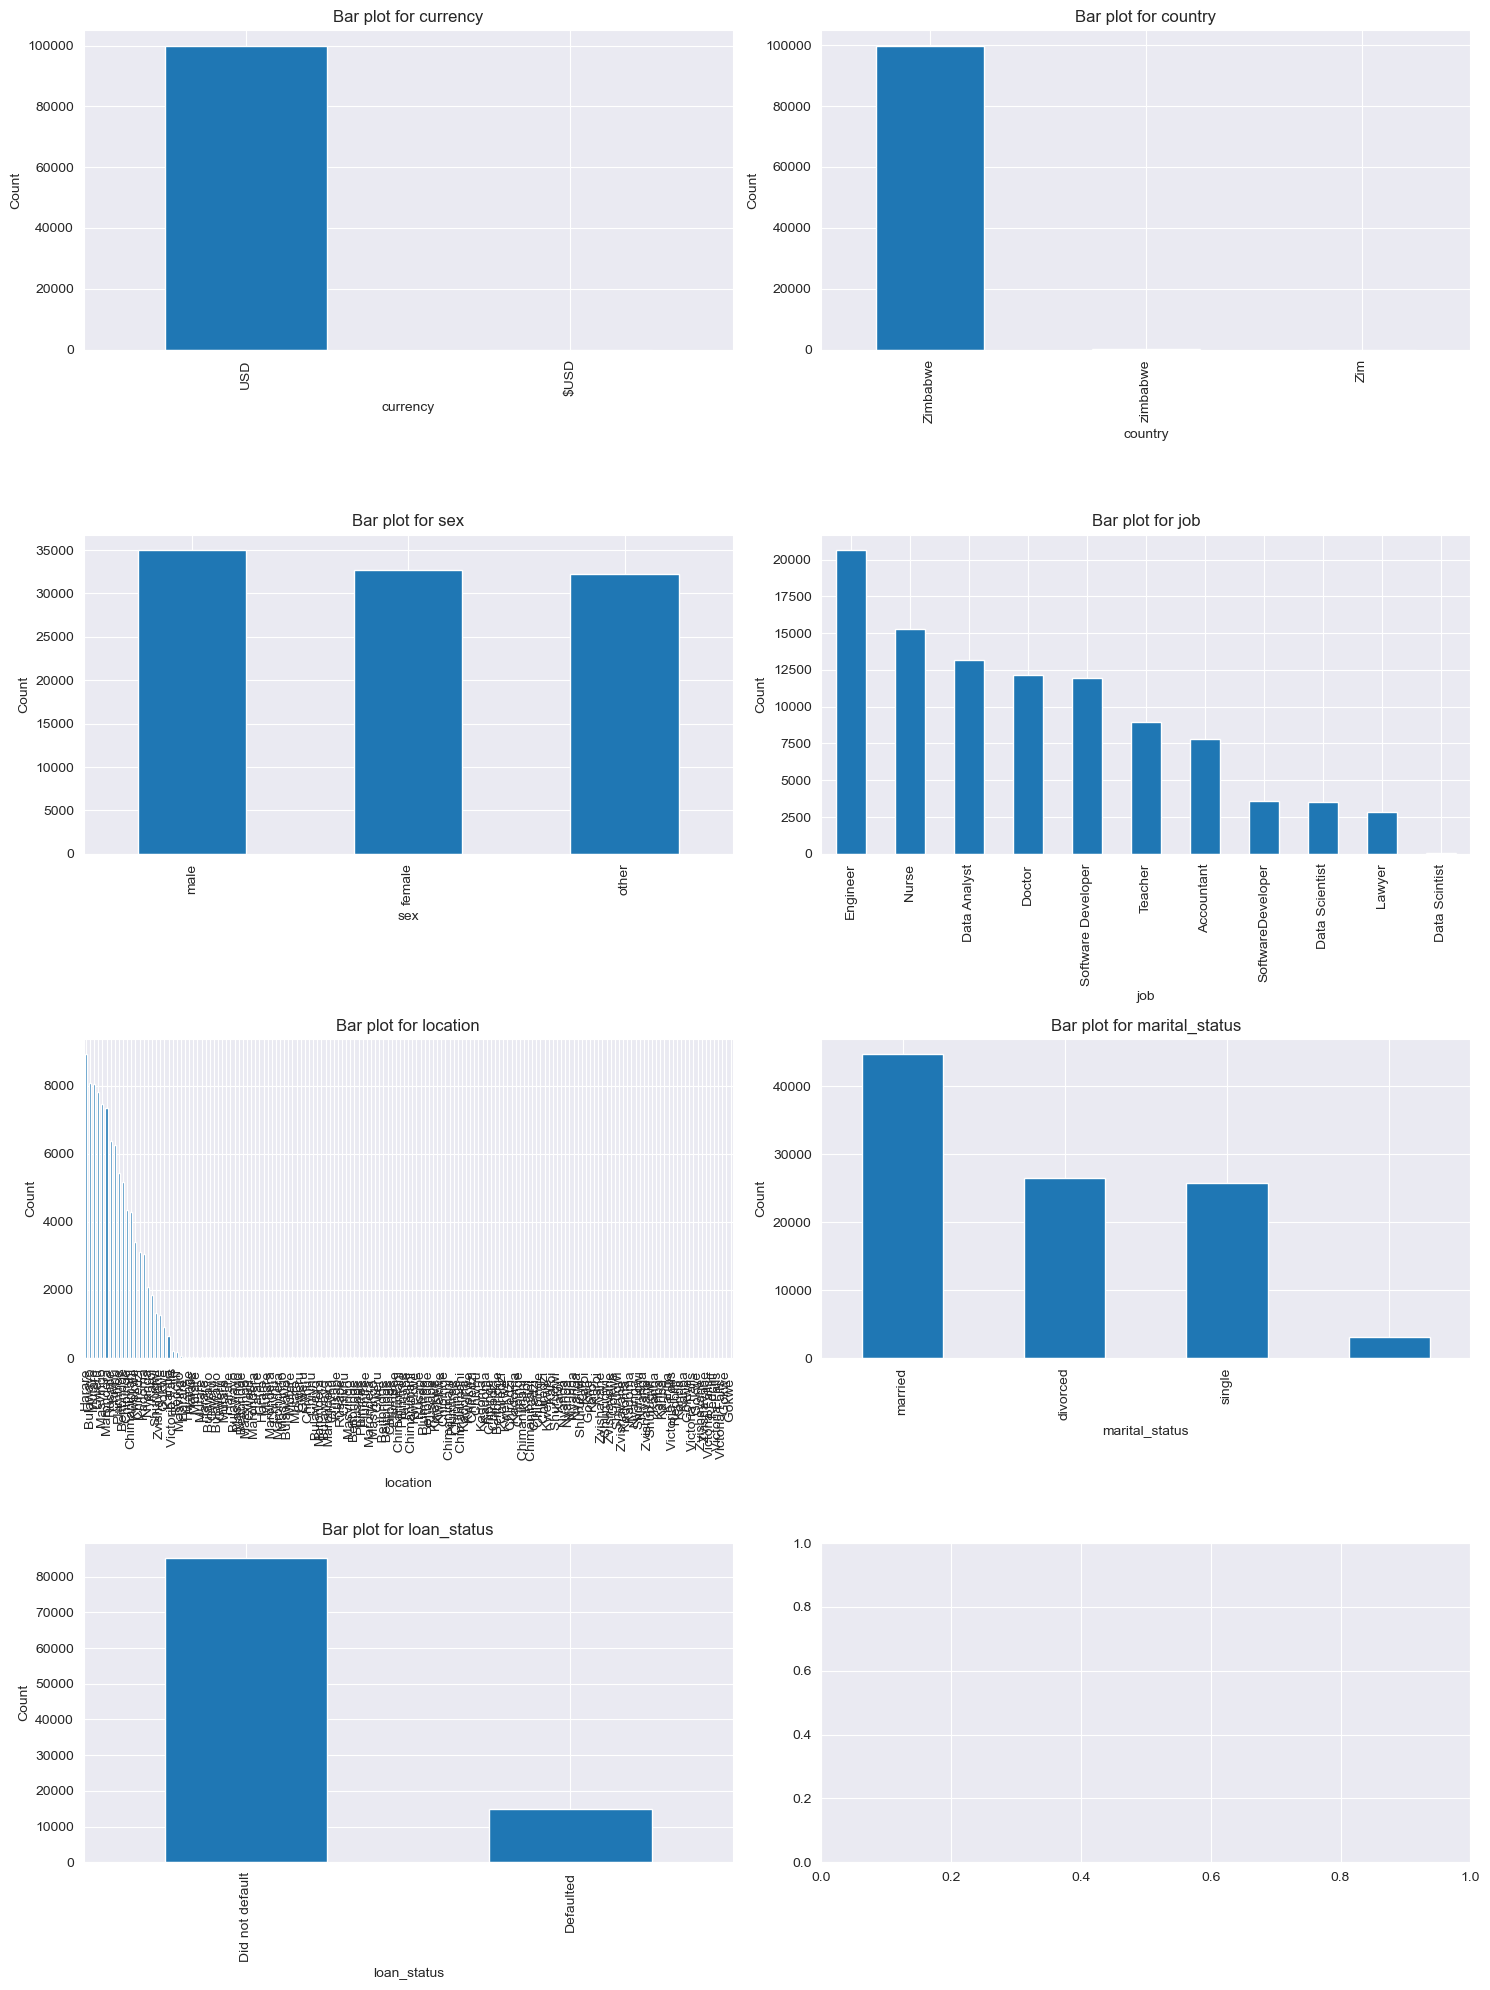

In [17]:
# Define the list of features
features = data.select_dtypes(include=[object]).columns.to_list()
plot_features(features, data)

* From the above we can see that `location`, `job`, `marital_status`, `country` and `currency` features needs to be cleaned and standardized

In [18]:
values,counts = np.unique(data.location, return_counts=True)
for value, count in zip(values,counts):
    print(f"{value}, {count}")

   Beitbridge , 32
   Beitbridge   , 22
   Bulawayo , 33
   Bulawayo   , 30
   Chimanimani , 20
   Chimanimani   , 11
   Chipinge , 12
   Chipinge   , 20
   Chiredzi , 15
   Chiredzi   , 14
   Chivhu , 25
   Chivhu   , 27
   Gokwe , 1
   Gokwe   , 7
   Gweru , 30
   Gweru   , 34
   Harare , 33
   Harare   , 44
   Kadoma , 12
   Kadoma   , 6
   Kariba , 2
   Kariba   , 3
   Karoi , 6
   Karoi   , 11
   Kwekwe , 18
   Kwekwe   , 10
   Marondera , 30
   Marondera   , 27
   Masvingo , 32
   Masvingo   , 32
   Mutare , 39
   Mutare   , 33
   Nyanga , 8
   Nyanga   , 5
   Plumtree , 19
   Plumtree   , 16
   Redcliff   , 3
   Rusape , 18
   Rusape   , 24
   Shurugwi , 6
   Shurugwi   , 4
   Victoria Falls , 3
   Zvishavane , 1
   Zvishavane   , 4
 Beitbridge , 17
 Beitbridge   , 21
 Bulawayo , 34
 Bulawayo   , 28
 Chimanimani , 18
 Chimanimani   , 16
 Chipinge , 16
 Chipinge   , 16
 Chiredzi , 14
 Chiredzi   , 11
 Chivhu , 28
 Chivhu   , 29
 Gokwe , 6
 Gokwe   , 2
 Gweru , 22
 Gweru   , 33
 H

* The above shows that most location tho same are being seen as there unique values because of white space that's in front of the location text
* So i am going to remove the white space from the feature location

<Axes: ylabel='location'>

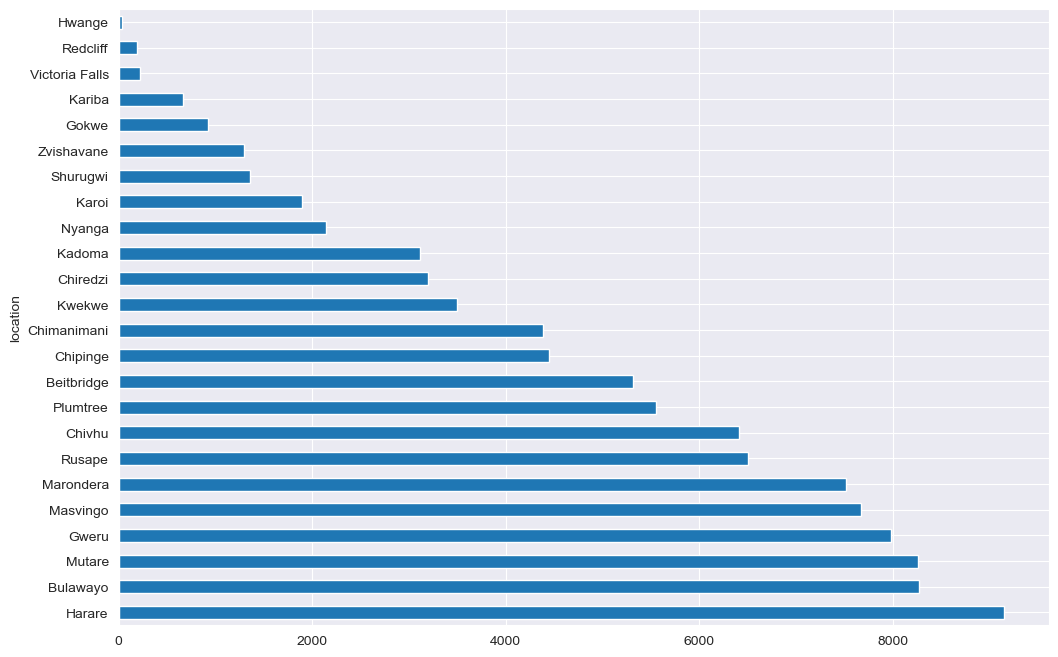

In [19]:
data["location"] = data["location"].str.strip()
# Plotting
data["location"].value_counts().plot(kind='barh', figsize=(12, 8))

<Axes: xlabel='job'>

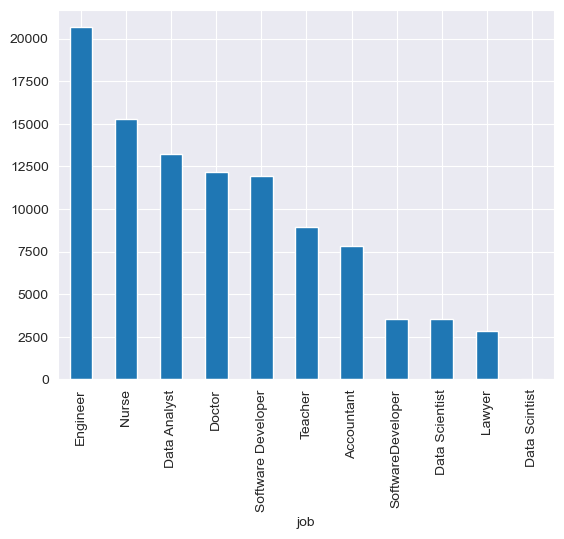

In [20]:
data["job"].value_counts().plot(kind="bar")

In [21]:
data['job'] = data['job'].str.replace(r'SoftwareDeveloper', 'Software Developer', regex=True)
data['job'] = data['job'].str.replace(r'Data Scintist', 'Data Scientist', regex=True)

In [22]:
data["job"].value_counts()

job
Engineer              20660
Software Developer    15496
Nurse                 15284
Data Analyst          13204
Doctor                12186
Teacher                8950
Accountant             7802
Data Scientist         3556
Lawyer                 2862
Name: count, dtype: int64

In [23]:
data['country'] = data['country'].str.replace(r'(?<!\w)Zim(?!\w)', 'Zimbabwe', regex=True)
data['country'] = data['country'].str.replace(r'zimbabwe', 'Zimbabwe', regex=True)

In [24]:
data.country.value_counts()

country
Zimbabwe    100000
Name: count, dtype: int64

In [25]:
data[data["marital_status"] == " "]

,disbursement_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,remaining_term,salary,marital_status,age,loan_status
43,2023-10-12,USD,Zimbabwe,male,True,Accountant,Nyanga,53000.0,0,47908.382308,0.22,43,0,66,4029.182109,,43,Did not default
46,2022-09-07,USD,Zimbabwe,male,True,Nurse,Rusape,21000.0,2,32010.804079,0.21,46,2,41,2172.367370,,46,Did not default
56,2020-09-07,USD,Zimbabwe,female,True,Teacher,Marondera,40000.0,2,31575.202717,0.22,40,2,56,3502.570364,,40,Did not default
164,2021-08-07,USD,Zimbabwe,other,True,Nurse,Harare,35000.0,0,35203.459313,0.21,45,0,77,3965.866597,,45,Did not default
201,2020-06-26,USD,Zimbabwe,male,True,Software Developer,Chiredzi,26000.0,0,29219.996988,0.22,44,0,44,2462.567968,,44,Did not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99860,2022-12-14,USD,Zimbabwe,male,True,Nurse,Harare,26000.0,0,33869.045205,0.22,49,0,34,1966.933126,,49,Did not default
99905,2021-04-06,USD,Zimbabwe,male,True,Doctor,Mutare,30000.0,0,43916.108935,0.22,46,0,40,2279.161532,,46,Did not default
99975,2021-05-26,USD,Zimbabwe,male,True,Doctor,Chipinge,17000.0,0,29222.426824,0.22,41,0,47,2271.360413,,41,Did not default
99979,2021-08-17,USD,Zimbabwe,other,True,Data Analyst,Mutare,33000.0,0,36943.492191,0.20,46,0,68,3318.342155,,46,Did not default


In [26]:
# data["marital_status"] = data["marital_status"].replace({"yes": 1, "no": 0})
data["marital_status"] = data["marital_status"].replace(" ", np.NAN, regex=True)
data[data["marital_status"] == " "]

,disbursement_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,remaining_term,salary,marital_status,age,loan_status


In [27]:
#drop all nan values from marital_status feature
data.dropna(inplace=True)

In [28]:
data.shape

(96873, 18)

In [29]:
data.loan_status.value_counts()

loan_status
Did not default    82486
Defaulted          14387
Name: count, dtype: int64

In [30]:
data['loan_status'] = data['loan_status'].str.replace(r'Did not default', 'did_not_default', regex=True)
data['loan_status'] = data['loan_status'].str.replace(r'Defaulted', 'defaulted', regex=True)

In [31]:
data['currency'] = data['currency'].str.replace(r'\$', '', regex=True)

In [32]:
data.currency.value_counts()

currency
USD    96873
Name: count, dtype: int64

### both the currency and country features have a single value for all records (USD for currency and Zimbabwe for country), these features are unlikely to provide meaningful predictive power for a credit score or any other target variable. Here’s why

* `Lack of Variability`: Machine learning models rely on variability in features to discern patterns and make predictions. If a feature has only one unique value (or very few unique values with overwhelming dominance), it doesn't contribute to distinguishing between different outcomes of the target variable. In your case, all records have the same value for both currency and country, so these features would not help in predicting credit scores.

* `No Discriminative Power`: Features that do not vary across records cannot differentiate between different instances or provide any information that correlates with the target variable (credit score). A feature like currency being USD for all records or country being Zimbabwe for all records does not provide any predictive power because there’s no variation to learn from.

* `Dimensionality Reduction`: In practical terms, keeping features that do not vary adds unnecessary complexity to your model without adding any value. It's generally preferable to remove such features to simplify the model and potentially improve its performance.

In [33]:
data.drop(columns=['country', 'currency'], inplace=True)

In [34]:
data.dropna(inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96873 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   disbursement_date    96873 non-null  datetime64[ns]
 1   sex                  96873 non-null  object        
 2   is_employed          96873 non-null  bool          
 3   job                  96873 non-null  object        
 4   location             96873 non-null  object        
 5   loan_amount          96873 non-null  float64       
 6   number_of_defaults   96873 non-null  int64         
 7   outstanding_balance  96873 non-null  float64       
 8   interest_rate        96873 non-null  float64       
 9   age                  96873 non-null  int64         
 10  number_of_defaults   96873 non-null  int64         
 11  remaining_term       96873 non-null  int64         
 12  salary               96873 non-null  float64       
 13  marital_status       96873 non-null 

### Dealing with Skewed Data

- **Definition**: Skewed data has an asymmetrical distribution with a long tail on one side.
- **Impact**: It distorts mean and median, biases regression and classification models, and violates normality assumptions.
- **Challenges**: Leads to poor model generalization and sensitivity to outliers.
- **Mitigation**: Use data transformations, handle outliers, balance classes, and employ robust algorithms.


In [36]:
def plot_multiple_features(_features, _data):
    # Calculate the number of rows needed
    n_features = len(_features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division to ensure all features are included
    
    # Calculate the figure size
    fig_width = 10  # Adjust this based on your preference
    fig_height = n_rows * 5  # Adjust this based on the number of rows
    
    # Create subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    
    # Loop through each feature
    for i, feature in enumerate(_features):
        row = i // n_cols
        col = i % n_cols
    
        # Plot histogram with density plot
        sns.histplot(_data[feature], kde=True, bins=30, ax=axs[row, col])
    
        # Add title and labels
        axs[row, col].set_title('Distribution of ' + feature)
        axs[row, col].set_xlabel(feature)
        axs[row, col].set_ylabel("Count")
    
        # Add text annotation with comments and statistics
        stats = f"""
        feature: {feature}
        Std: {round(_data[feature].std(), 2)}
        Skewness: {round(_data[feature].skew(), 2)}
        Mean: {round(_data[feature].mean(), 2)}
        """
        
        axs[row, col].annotate(stats,
                               xy=(0.5, 0.5),
                               xycoords='axes fraction',
                               ha='center',
                               va='center',
                               fontsize=10,
                               fontfamily='sans-serif'
                               )
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

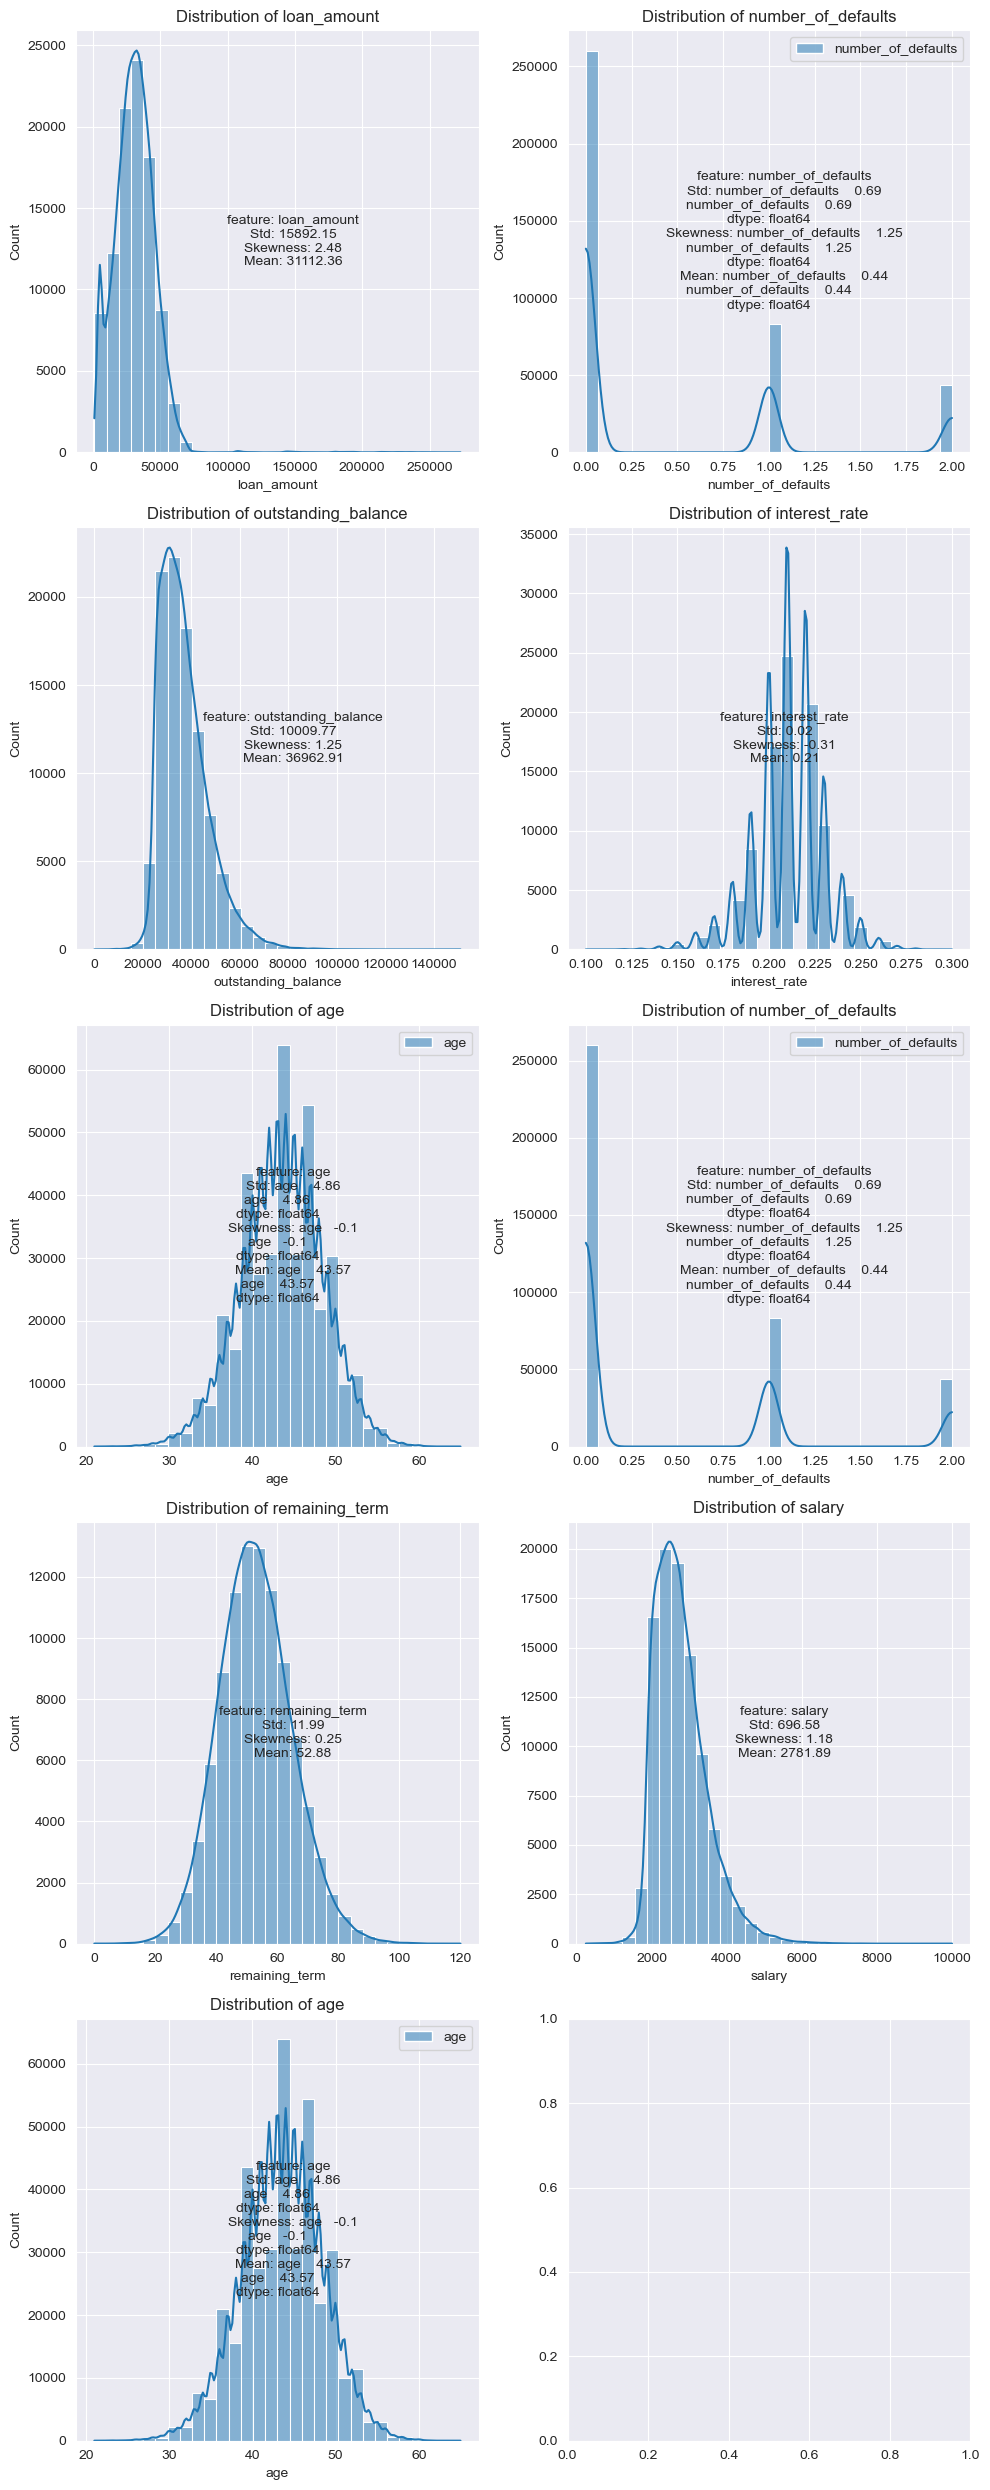

In [37]:
##### Understanding the distribution of each feature
# Define the list of features
features = data.select_dtypes(include=[int,float]).columns.to_list()

plot_multiple_features(features , data)

#### Dealing with features with potential skew
* Log Transformation: Applying a log transformation can help in reducing the skewness of a distribution, making it closer to a normal (Gaussian) distribution. This can improve the performance of many statistical and machine learning models that assume normality or benefit from it.

In [38]:
# Scale the data using the natural logarithm
# Columns to transform
columns_to_transform = ["outstanding_balance", "salary", "loan_amount"]

# Apply log transformation to each column individually
for col in columns_to_transform:
    data[col] = np.log(data[col] + 1)

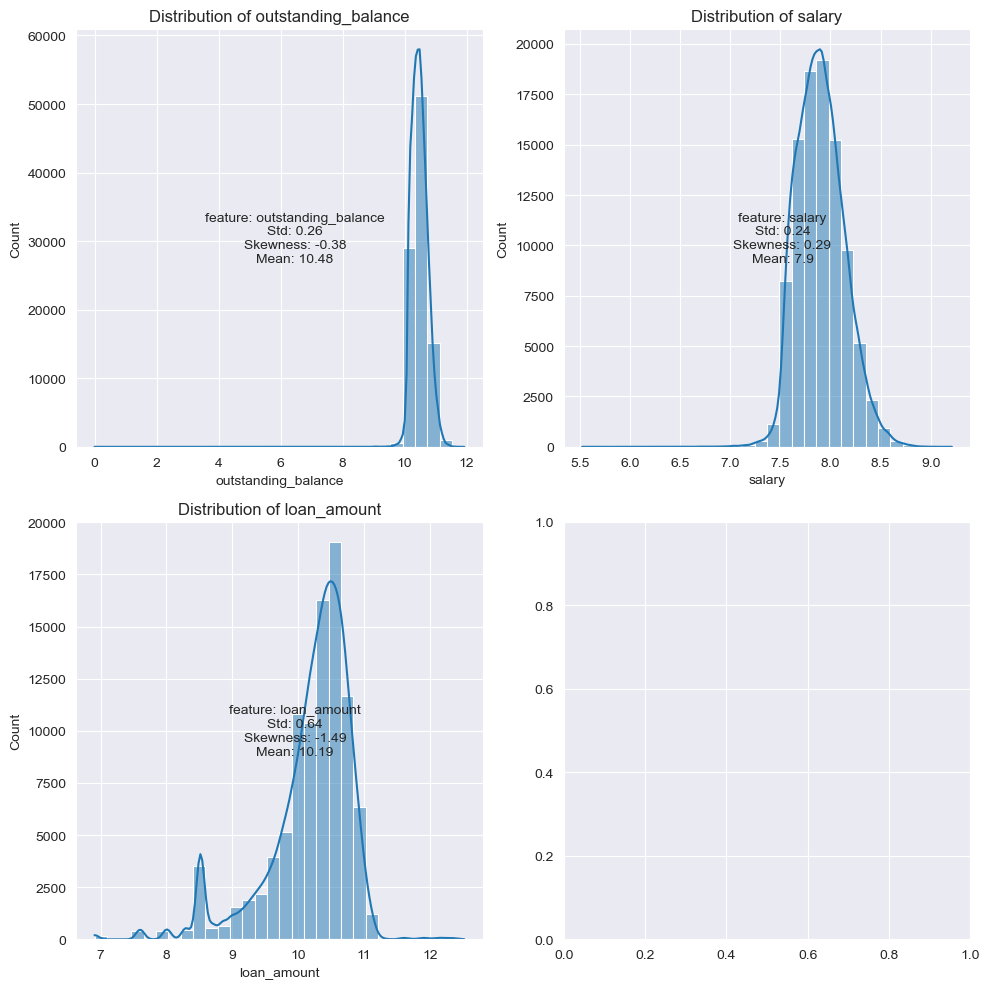

In [39]:
plot_multiple_features(columns_to_transform , data)

* Write your comments here like these features are now skewed zvakanaka etc

### Detecting and removing Outliers

- **Definition**: Outliers are data points significantly different from others in a dataset.
- **Impact**: They skew statistical measures, bias models in regression and classification, and reduce model robustness.
- **Anomaly Detection**: Techniques like  ML algorithms (Isolation Forest, LOF) help identify and remove outliers.
- **Benefits**: Removing outliers improves model accuracy, robustness, and enhances generalization to new data.


In [40]:
clf = IsolationForest(contamination=0.1)  # Adjust contamination parameter
clf.fit(data[features])
outliers = clf.predict(data[features])

In [41]:
clean_data = data[outliers == 1]
outlier_data = data[outliers == -1]

#### Visualization of the removed outliers

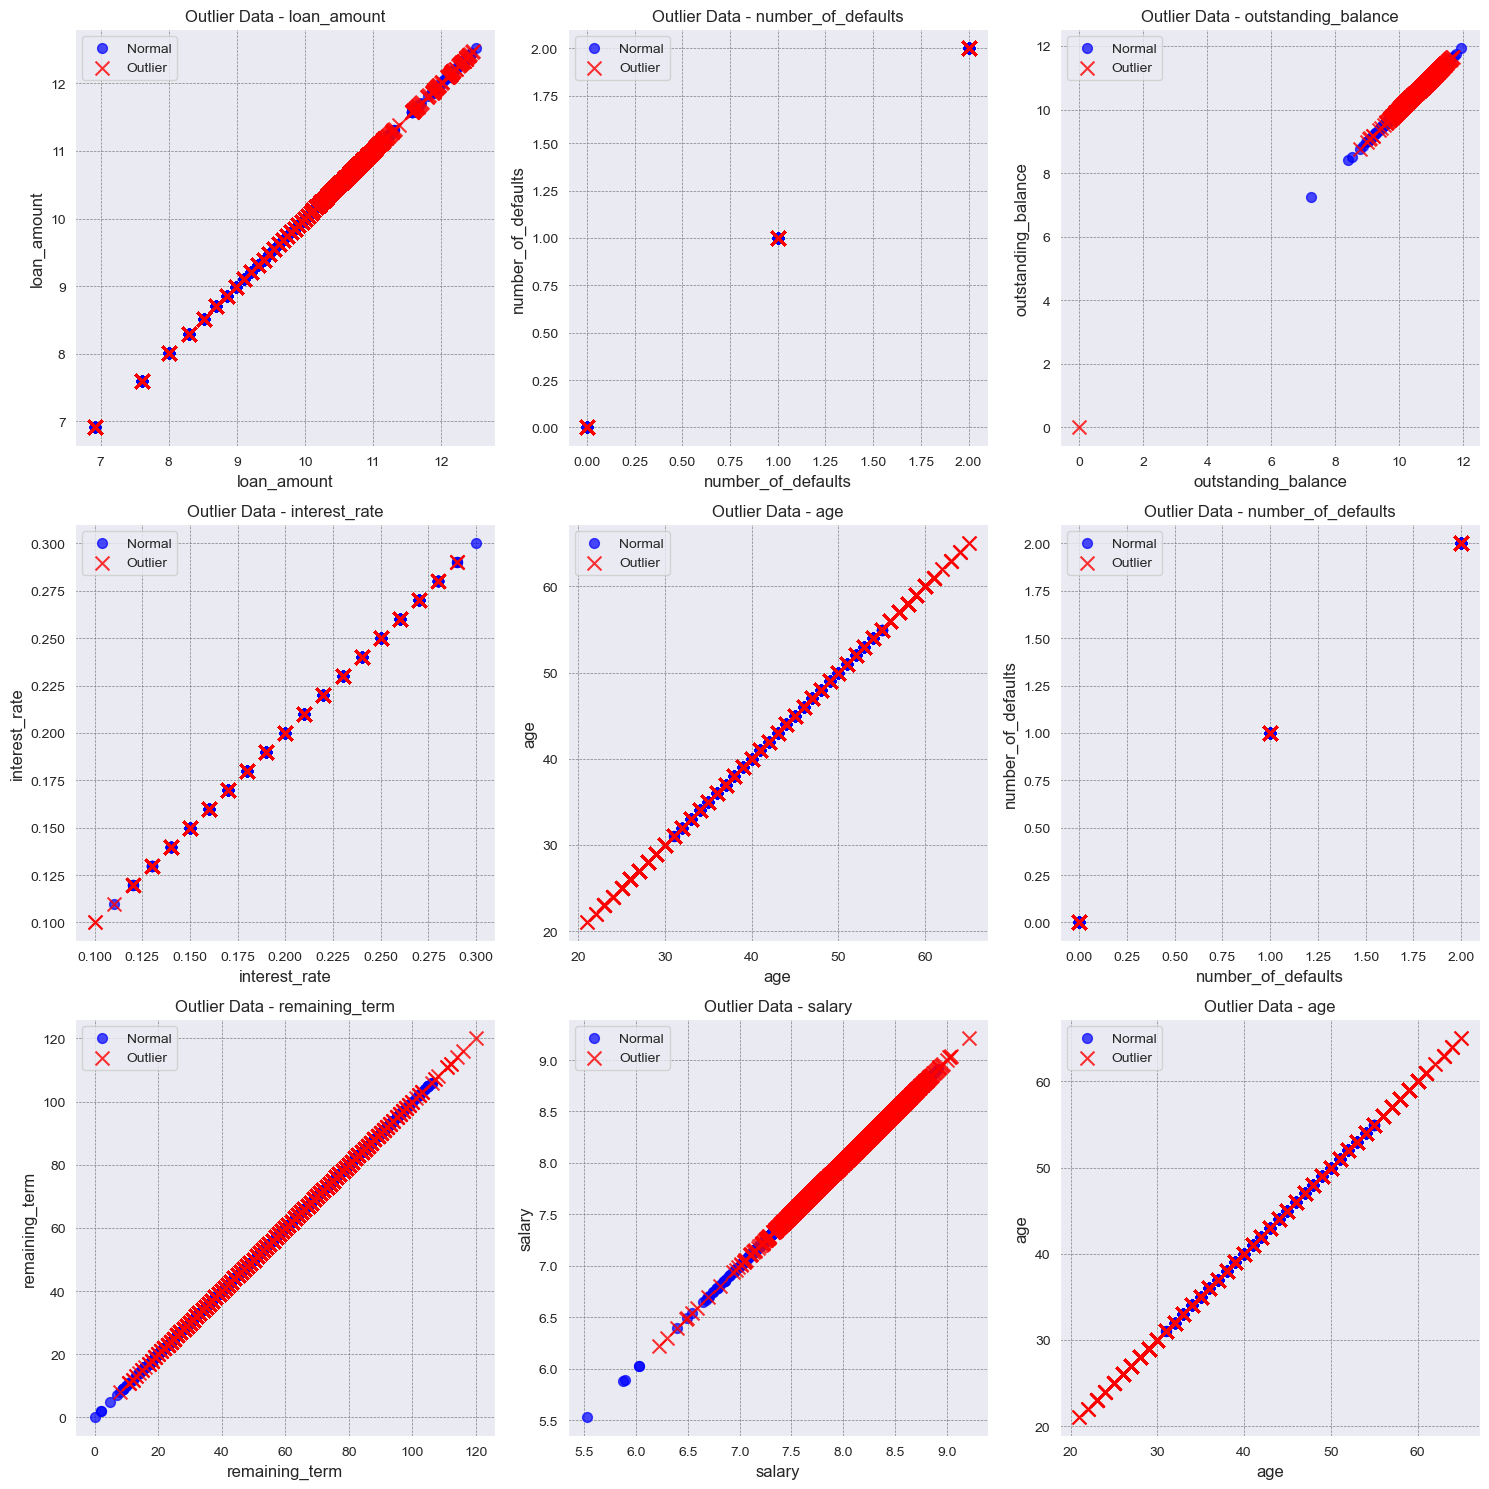

In [42]:
n_features = len(features)
nrows = 3  # Number of rows (adjust based on the number of features)
ncols = 3  # Number of columns (adjust based on the number of features)

# Check if number of subplots matches number of features
if n_features > nrows * ncols:
    raise ValueError(f"Number of features ({n_features}) exceeds available subplots ({nrows} rows, {ncols} cols)")

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))  # Create subplots

for i, feature in enumerate(features):
    # Calculate subplot index
    row = i // ncols
    col = i % ncols

    # Access each subplot using indexing
    ax = axes[row, col]

    # Normal data on subplot
    ax.scatter(clean_data[feature], clean_data[feature], color='blue', label='Normal', s=50, alpha=0.7, marker='o')
    ax.set_title(f'Normal Data - {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel(feature, fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
    ax.legend(loc='upper left', fontsize=10)

    # Outliers on subplot
    ax.scatter(outlier_data[feature], outlier_data[feature], color='red', label='Outlier', s=100, alpha=0.8, marker='x')
    ax.set_title(f'Outlier Data - {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel(feature, fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
    ax.legend(loc='upper left', fontsize=10)

# Adjust layout (optional)
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [43]:
clean_data.shape

(87185, 16)

### Exploring the clean data by asking questions about the data

1. **Trends and Patterns**: Identify trends over time or across variables.
2. **Relationships**: Explore correlations and influences between variables.
3. **Validation**: Validate hypotheses and assumptions with evidence.
4. **Decision Making**: Inform data-driven decisions and improve strategies based on insights.


In [44]:
clean_data.head()

,disbursement_date,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,remaining_term,salary,marital_status,age,loan_status
0,2022-10-29,female,True,Teacher,Beitbridge,10.571343,0,10.792490,0.22,37,0,47,8.080559,married,37,did_not_default
1,2020-06-06,other,True,Teacher,Harare,10.203629,2,10.266500,0.20,43,2,62,8.069386,single,43,did_not_default
2,2023-09-29,other,True,Nurse,Gweru,10.463132,1,10.709931,0.22,43,1,57,8.111276,married,43,did_not_default
3,2022-06-22,female,True,Doctor,Rusape,10.085851,0,10.482416,0.23,47,0,42,7.717706,divorced,47,did_not_default
4,2023-02-08,male,True,Nurse,Chipinge,9.852247,0,10.438724,0.20,42,0,45,7.745807,married,42,did_not_default


#### What are the job of those who have a higher number of loans

<Figure size 1000x600 with 0 Axes>

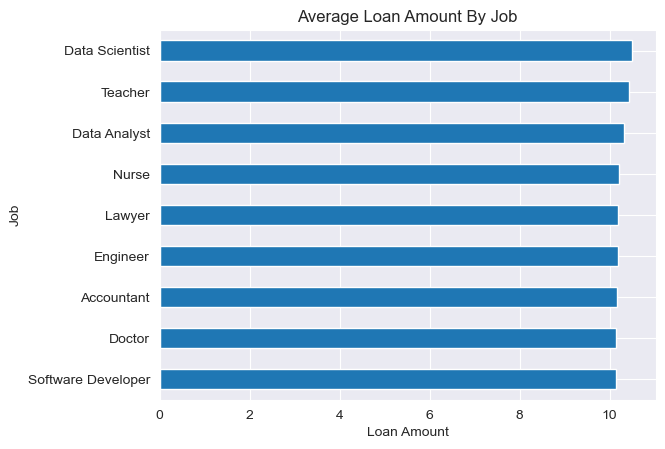

In [45]:

# Group by 'job' and calculate average loan amount and count of individuals
loan_stats = clean_data.groupby('job')['loan_amount'].agg(['mean', 'count'])

# Filter occupations with at least 2 individuals
loan_stats = loan_stats[loan_stats['count'] >= 2]  # Adjust threshold as per your data

# Sort by average loan amount
loan_stats_sorted = loan_stats.sort_values('mean')

# Set the figure size before plotting
plt.figure(figsize=(10, 6))  # Width, height in inches

# Plotting
loan_stats_sorted.plot(kind='barh', y='mean', title='Average Loan Amount By Job', legend=False)

plt.xlabel('Loan Amount')
plt.ylabel('Job')
plt.show()


#### How does loan status vary by location

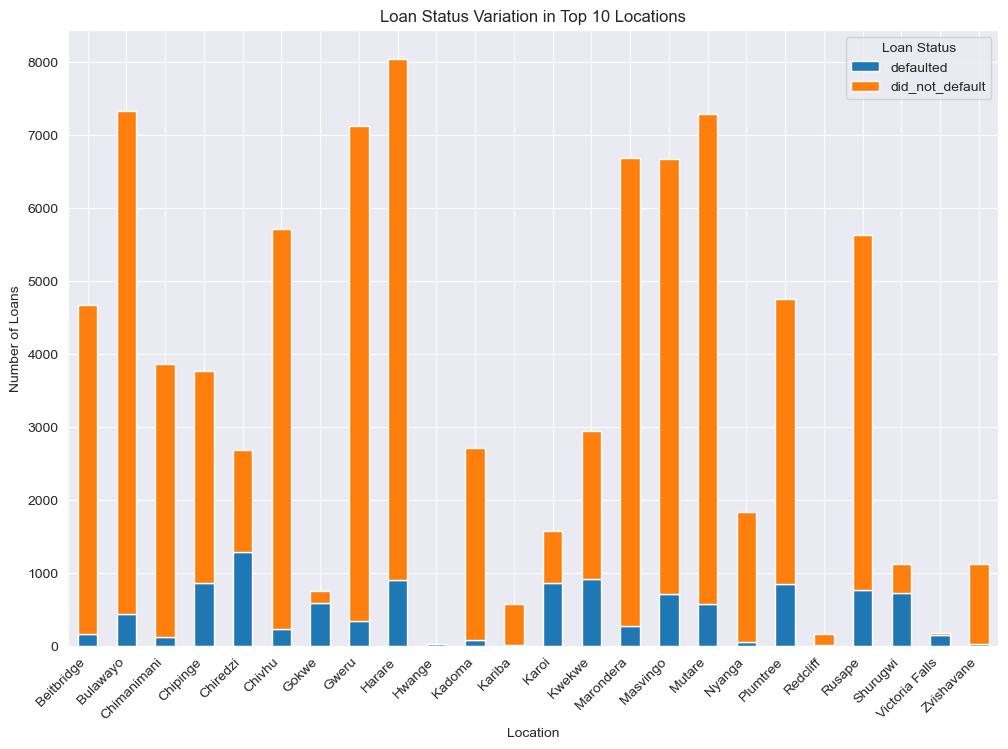

In [46]:
# Count loans by location
loan_counts_by_location = clean_data['location'].value_counts()

# Select top 10 locations by loan count
top_10_locations = loan_counts_by_location.head(24)

# Filter data for top 10 locations
df_top_10 = clean_data[clean_data['location'].isin(top_10_locations.index)]

# Group by 'location' and 'loan_status', then unstack for plotting
loan_status_by_location = df_top_10.groupby(['location', 'loan_status']).size().unstack()

# Plotting
loan_status_by_location.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Loan Status Variation in Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend(title='Loan Status')
plt.show()

### Is there a relationship between interest rate and loan amount?

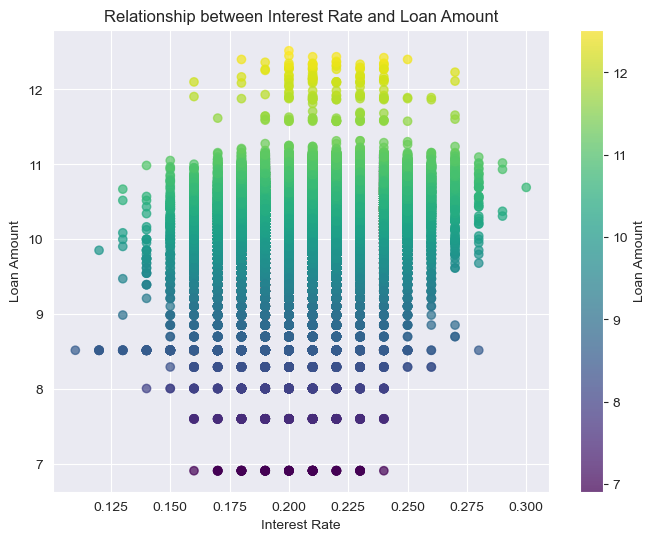

In [47]:
# Scatter plot of interest rate vs loan amount with different colors
plt.figure(figsize=(8, 6))
plt.scatter(clean_data['interest_rate'], clean_data['loan_amount'], c=clean_data['loan_amount'], cmap='viridis', alpha=0.7)
plt.title('Relationship between Interest Rate and Loan Amount')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.colorbar(label='Loan Amount')
plt.grid(True)
plt.show()

#### What is the distribution of salaries among employed vs unemployed individuals?

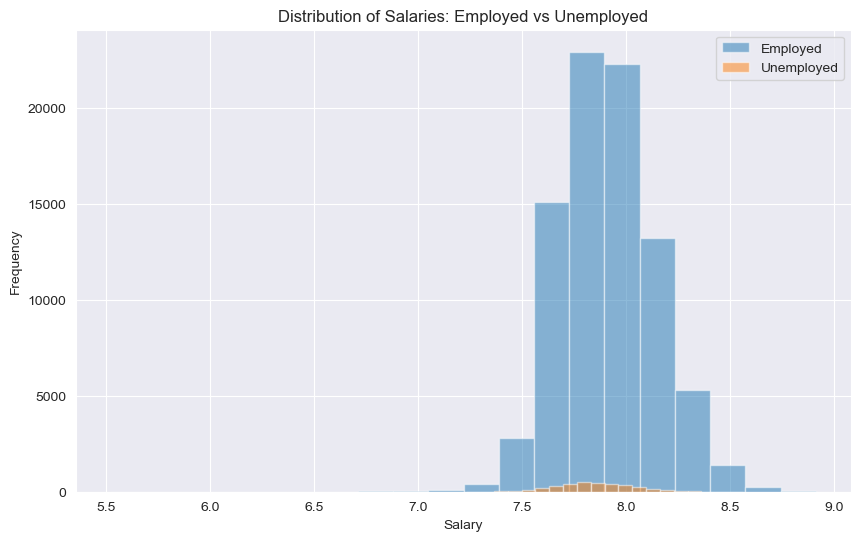

In [48]:
# Separate data by employment status
employed_salaries = clean_data[clean_data['is_employed']]['salary']
unemployed_salaries = clean_data[~clean_data['is_employed']]['salary']

# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(employed_salaries, bins=20, alpha=0.5, label='Employed')
plt.hist(unemployed_salaries, bins=20, alpha=0.5, label='Unemployed')
plt.title('Distribution of Salaries: Employed vs Unemployed')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Which location has the highest number of loans disbursed?

In [49]:
# Count loans by location
loan_counts_by_location = clean_data['location'].value_counts()

# Identify location with the highest loan count
location_with_most_loans = loan_counts_by_location.idxmax()

print(f"Location '{location_with_most_loans}' has the highest number of loans disbursed.")


Location 'Harare' has the highest number of loans disbursed.


## Feature Engineering
- **Feature engineering**: involves creating new features or transforming existing ones to improve model performance and interpretability. It helps by:
- **Improving Model Accuracy**: By providing more relevant information to the model.
- **Enhancing Model Robustness**: Making the model less sensitive to noise and outliers.
- **Enabling Better Insights**: Creating features that better capture relationships and patterns in the data.
- **Optimizing Model Efficiency**: Reducing the computational cost and time required for training and inference.


### Feature Extraction

In [50]:
clean_data.loc[:, 'loan_to_income_ratio'] = round(clean_data['loan_amount'] / clean_data['salary'], 1)

C:\Users\kudzai\AppData\Local\Temp\ipykernel_5744\1028097130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'loan_to_income_ratio'] = round(clean_data['loan_amount'] / clean_data['salary'], 1)


In [51]:
# Define a threshold for outstanding_balance to determine delinquency
outstanding_balances = clean_data['outstanding_balance'].values

# Calculate the 95th percentile of outstanding_balance
delinquency_threshold = np.percentile(outstanding_balances, 95)

# Create binary delinquency feature using .loc for assignment
clean_data.loc[:, 'is_delinquent'] = (clean_data['outstanding_balance'] > delinquency_threshold).astype(int)

C:\Users\kudzai\AppData\Local\Temp\ipykernel_5744\2436964067.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'is_delinquent'] = (clean_data['outstanding_balance'] > delinquency_threshold).astype(int)


* `Loan-to-income ratio`: Divide loan_amount by salary to assess the borrower's ability to repay the loan relative to their income. A higher ratio indicates a higher risk of default.
* `Payment delinquency`: Create a binary feature (1 for delinquent, 0 for not delinquent) based on a threshold for outstanding_balance or overdue payments (if available). This indicates a potential repayment issue.

In [52]:
# Use .loc for assignment to avoid SettingWithCopyWarning
clean_data.loc[:, 'year'] = clean_data['disbursement_date'].dt.year
clean_data.loc[:, 'month'] = clean_data['disbursement_date'].dt.month
clean_data.loc[:, 'day'] = clean_data['disbursement_date'].dt.day
clean_data.loc[:,'quarter'] = clean_data['disbursement_date'].dt.quarter
clean_data.loc[:,'day_of_week'] = clean_data['disbursement_date'].dt.dayofweek

C:\Users\kudzai\AppData\Local\Temp\ipykernel_5744\2058772886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'year'] = clean_data['disbursement_date'].dt.year
C:\Users\kudzai\AppData\Local\Temp\ipykernel_5744\2058772886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'month'] = clean_data['disbursement_date'].dt.month
C:\Users\kudzai\AppData\Local\Temp\ipykernel_5744\2058772886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [53]:
# Drop the disbursement_date feature to reduce redundancy 
clean_data.drop(columns = ["disbursement_date"], inplace=True)

C:\Users\kudzai\AppData\Local\Temp\ipykernel_5744\278995020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns = ["disbursement_date"], inplace=True)


* `Year (year)`:
  - **Usefulness**: Captures the specific year when the loan was disbursed. Reflects macroeconomic conditions, policy changes, and overall economic stability, influencing borrowers' ability to repay loans.
  - **Example**: Economic downturns or recessions in certain years may lead to higher default rates due to increased unemployment or decreased consumer spending.

* `Month (month)`:
  - **Usefulness**: Indicates the month when the loan was disbursed. Captures seasonal trends, consumer behavior, and economic activities that vary throughout the year.
  - **Example**: Loans disbursed around holiday seasons (e.g., December) might have higher default rates due to increased spending on gifts and travel, impacting borrowers' finances.

* `Day (day)`:
  - **Usefulness**: Specifies the day of the month when the loan was disbursed. Captures end-of-month effects on borrower finances, salary payments, or other financial behaviors.
  - **Example**: Loans disbursed at the end of the month might coincide with payday for many borrowers, potentially lowering default rates as borrowers have more funds available.

* `Quarter (quarter)`:
  - **Usefulness**: Indicates the quarter of the year when the loan was disbursed (Q1 to Q4). Provides a broader seasonal view, capturing trends and economic conditions over three-month periods.
  - **Example**: Loans disbursed in Q4 (October to December) might experience different repayment dynamics due to holiday spending and year-end financial planning.

* `Day of the Week (day_of_week)`:
  - **Usefulness**: Specifies the day of the week (Monday to Sunday) when the loan was disbursed. Captures weekly patterns in borrower behavior, financial transactions, and spending habits.
  - **Example**: Loans disbursed at the end of the week (e.g., Thursday or Friday) might exhibit different default patterns due to the timing of payments and borrower spending behavior over weekends.

In [54]:
clean_data.head()

,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults,...,marital_status,age,loan_status,loan_to_income_ratio,is_delinquent,year,month,day,quarter,day_of_week
0,female,True,Teacher,Beitbridge,10.571343,0,10.792490,0.22,37,0,...,married,37,did_not_default,1.3,0,2022,10,29,4,5
1,other,True,Teacher,Harare,10.203629,2,10.266500,0.20,43,2,...,single,43,did_not_default,1.3,0,2020,6,6,2,5
2,other,True,Nurse,Gweru,10.463132,1,10.709931,0.22,43,1,...,married,43,did_not_default,1.3,0,2023,9,29,3,4
3,female,True,Doctor,Rusape,10.085851,0,10.482416,0.23,47,0,...,divorced,47,did_not_default,1.3,0,2022,6,22,2,2
4,male,True,Nurse,Chipinge,9.852247,0,10.438724,0.20,42,0,...,married,42,did_not_default,1.3,0,2023,2,8,1,2


In [55]:
clean_data = clean_data.loc[:, ~clean_data.columns.duplicated(keep='first')]

In [56]:
clean_data.head()

,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining_term,salary,marital_status,loan_status,loan_to_income_ratio,is_delinquent,year,month,day,quarter,day_of_week
0,female,True,Teacher,Beitbridge,10.571343,0,10.792490,0.22,37,47,8.080559,married,did_not_default,1.3,0,2022,10,29,4,5
1,other,True,Teacher,Harare,10.203629,2,10.266500,0.20,43,62,8.069386,single,did_not_default,1.3,0,2020,6,6,2,5
2,other,True,Nurse,Gweru,10.463132,1,10.709931,0.22,43,57,8.111276,married,did_not_default,1.3,0,2023,9,29,3,4
3,female,True,Doctor,Rusape,10.085851,0,10.482416,0.23,47,42,7.717706,divorced,did_not_default,1.3,0,2022,6,22,2,2
4,male,True,Nurse,Chipinge,9.852247,0,10.438724,0.20,42,45,7.745807,married,did_not_default,1.3,0,2023,2,8,1,2


### Feature Analysis

Feature analysis involves evaluating the relevance, impact, and relationships of variables in a dataset to understand their influence on outcomes.
- **Importance**: It helps in selecting the most predictive features for modeling, improving model accuracy and interpretability.
- **Insight Generation**: Enables insights into data patterns, aiding in better decision-making and problem-solving.


In [57]:
numerical_features = clean_data.select_dtypes(include=[int,float]).columns.to_list()
string_features = clean_data.select_dtypes(include=[object]).columns.to_list()

#### Correlation Analysis
**Correlation Analysis** determines the strength and direction of relationships between variables in a dataset.
It helps in understanding how changes in one variable may affect another, aiding in feature selection and model building.
Identifying correlations ensures accurate model inputs and improves predictive accuracy in data-driven analyses.


In [58]:
corr_matrix = clean_data[numerical_features].corr()
corr_matrix

,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining_term,salary,loan_to_income_ratio,is_delinquent,year,month,day,quarter,day_of_week
loan_amount,1.000000,0.030474,0.545732,0.189735,-0.004363,0.014910,0.537814,0.788101,0.221963,0.000343,0.005587,0.002710,0.004710,-0.002004
number_of_defaults,0.030474,1.000000,0.008917,-0.006700,-0.031932,-0.010018,0.008727,0.029600,-0.019439,0.001086,-0.001142,-0.003735,-0.001906,0.001506
outstanding_balance,0.545732,0.008917,1.000000,0.110639,-0.005588,0.005647,0.312994,0.413087,0.514179,-0.003656,0.000213,0.001557,-0.001404,-0.002089
interest_rate,0.189735,-0.006700,0.110639,1.000000,-0.011733,0.031618,0.190546,0.106708,0.042893,0.004394,0.005197,0.001963,0.005089,0.001411
age,-0.004363,-0.031932,-0.005588,-0.011733,1.000000,-0.057763,-0.202165,0.093689,-0.012171,-0.005175,0.002254,-0.001814,0.002734,0.005800
remaining_term,0.014910,-0.010018,0.005647,0.031618,-0.057763,1.000000,0.759081,-0.369630,-0.000553,-0.003491,0.004218,0.002684,0.004619,-0.001615
salary,0.537814,0.008727,0.312994,0.190546,-0.202165,0.759081,1.000000,0.046090,0.143759,-0.000521,0.005224,0.001921,0.004902,-0.000052
loan_to_income_ratio,0.788101,0.029600,0.413087,0.106708,0.093689,-0.369630,0.046090,1.000000,0.152873,0.000057,0.000926,0.001572,0.000735,-0.002730
is_delinquent,0.221963,-0.019439,0.514179,0.042893,-0.012171,-0.000553,0.143759,0.152873,1.000000,-0.001663,0.002013,0.007218,0.000420,-0.002515
year,0.000343,0.001086,-0.003656,0.004394,-0.005175,-0.003491,-0.000521,0.000057,-0.001663,1.000000,0.004609,0.000630,0.003978,0.001875


<Axes: >

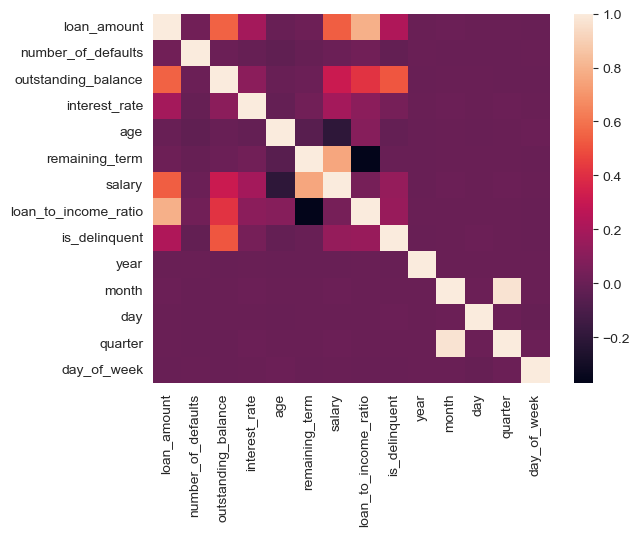

In [59]:
sns.heatmap(corr_matrix)

### Correlation Analysis Commentary

The correlation analysis reveals several insights:
- **Strong Relationships**: Loan amount shows strong positive correlations with salary (0.54) and loan-to-income ratio (0.58), indicating higher loans for higher salaries and higher income ratios.
- **Moderate Relationships**: Outstanding balance correlates moderately with loan amount (0.54) and salary (0.31), suggesting higher balances for larger loans and higher salaries.
- **Weak Relationships**: Interest rate has weak correlations with other variables (< 0.22), implying limited direct influence on loan amount or defaults.
- **Seasonal Trends**: Month and quarter show high correlations (0.97), indicating similar trends across months within each quarter.
- **Limited Impact**: Variables like day and day of the week show negligible correlations with other factors, suggesting minimal impact on loan dynamics.


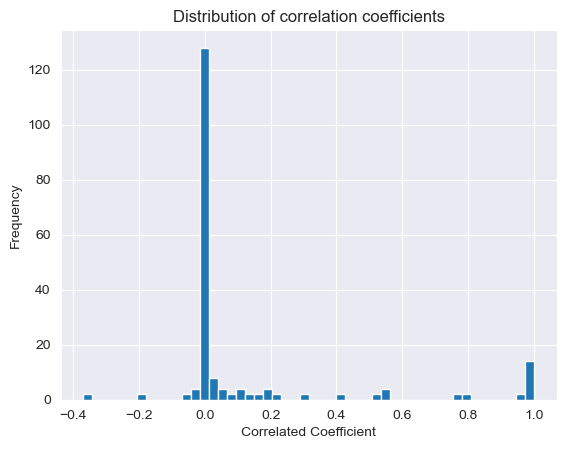

In [60]:
plt.hist(corr_matrix.values.flatten(), bins=50)
plt.xlabel("Correlated Coefficient")
plt.ylabel("Frequency")
plt.title("Distribution of correlation coefficients")
plt.show()

* Above identify patterns and deciding on a threshold for removing highly correlated features. The histogram will show you how many pairs of features fall into different correlation ranges, making it easier to see if there are many highly correlated pairs that might need to be addressed.

In [61]:
# Calculate the threshold
mean_corr = np.mean(corr_matrix.values.flatten())
std_corr = np.std(corr_matrix.values.flatten())
# Setting threshold based on distribution

# Approximately 95% of the data lies within ±2 standard deviations from the mean.
threshold = mean_corr +2 * std_corr
threshold

0.7356718368979708

In [62]:
# remove correlated features to reduce the feature space
def correlation(dataset, _threshold):
    col_corr = set()  # Set of all the names of correlated columns
    _corr_matrix = dataset.corr()
    for i in range(len(_corr_matrix.columns)):
        for j in range(i):
            if abs(_corr_matrix.iloc[i, j]) > _threshold: # we are interested in absolute coeff value
                colname = _corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(data[features], threshold)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [63]:
corr_features

{'age', 'number_of_defaults', 'salary'}

In [64]:
# remove correlated features
data.drop(labels=corr_features, axis=1, inplace=True)

Removing highly correlated features when predicting default risk is crucial because it:
- Reduces multicollinearity, ensuring more stable and reliable model parameters.
- Prevents overfitting, enabling the model to generalize better to new data and enhance predictive performance.
- Enhances interpretability by eliminating redundant information, facilitating the identification of key factors influencing default risk.
- Decreases computation time by reducing the feature space, making the modeling process more efficient.


#### Feature selection

In [65]:
import pandas as pd

# Assuming clean_data is your DataFrame

sex = {'male': 1, 'female': 2, 'other': 3}
clean_data.loc[:, 'sex'] = clean_data['sex'].map(sex).astype(int)

job = {
    "Accountant": 1,
    "Data Analyst": 2,
    "Data Scientist": 3,
    "Doctor": 4,
    "Engineer": 5,
    "Lawyer": 6,
    "Nurse": 7,
    "Software Developer": 8,
    "Teacher": 9
}
clean_data.loc[:, 'job'] = clean_data['job'].map(job).astype(int)

location = {
    "Beitbridge": 1,
    "Bulawayo": 2,
    "Chimanimani": 3,
    "Chipinge": 4,
    "Chiredzi": 5,
    "Chivhu": 6,
    "Gokwe": 7,
    "Gweru": 8,
    "Harare": 9,
    "Hwange": 10,
    "Kadoma": 11,
    "Kariba": 12,
    "Karoi": 13,
    "Kwekwe": 14,
    "Marondera": 15,
    "Masvingo": 16,
    "Mutare": 17,
    "Nyanga": 18,
    "Plumtree": 19,
    "Redcliff": 20,
    "Rusape": 21,
    "Shurugwi": 22,
    "Victoria Falls": 23,
    "Zvishavane": 24
}
clean_data.loc[:, 'location'] = clean_data['location'].map(location).astype(int)

marital_status = {'divorced': 1, 'married': 2, 'single': 3}
clean_data.loc[:, 'marital_status'] = clean_data['marital_status'].map(marital_status).astype(int)

loan_status = {'defaulted': 0, 'did_not_default': 1}
clean_data.loc[:, 'loan_status'] = clean_data['loan_status'].map(loan_status).astype(int)

clean_data.loc[:, "is_employed"] = clean_data["is_employed"].astype(int)


In [66]:
clean_data.loan_status = pd.to_numeric(clean_data.loan_status)
clean_data.sex = pd.to_numeric(clean_data.sex)
clean_data.job = pd.to_numeric(clean_data.job)
clean_data.marital_status = pd.to_numeric(clean_data.marital_status)
clean_data.location = pd.to_numeric(clean_data.location)

In [67]:
clean_data.head()

,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining_term,salary,marital_status,loan_status,loan_to_income_ratio,is_delinquent,year,month,day,quarter,day_of_week
0,2,1,9,1,10.571343,0,10.792490,0.22,37,47,8.080559,2,1,1.3,0,2022,10,29,4,5
1,3,1,9,9,10.203629,2,10.266500,0.20,43,62,8.069386,3,1,1.3,0,2020,6,6,2,5
2,3,1,7,8,10.463132,1,10.709931,0.22,43,57,8.111276,2,1,1.3,0,2023,9,29,3,4
3,2,1,4,21,10.085851,0,10.482416,0.23,47,42,7.717706,1,1,1.3,0,2022,6,22,2,2
4,1,1,7,4,9.852247,0,10.438724,0.20,42,45,7.745807,2,1,1.3,0,2023,2,8,1,2


**Feature selection with Recursive Feature Elimination (RFE)** is a technique used to select the most important features by recursively fitting a model and eliminating the least important features based on their coefficients or importance scores. It involves the following steps:

1. **Model Training**: Starts with a model (e.g., linear regression, SVM) trained on all features.
   
2. **Feature Ranking**: Ranks features by importance or coefficient magnitude.
   
3. **Feature Elimination**: Iteratively removes the least important features and re-trains the model until the desired number of features is reached or performance criteria are met.

4. **Benefits**: Helps improve model performance by focusing on the most relevant features, reduces overfitting, and enhances model interpretability by identifying key predictors.


In [68]:
X = clean_data.drop(columns=['loan_status'])
y = clean_data['loan_status']

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [71]:
# Example: Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000)

In [72]:
# Example: Perform RFE with logistic regression
rfe = RFE(estimator=lr, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

In [73]:
# Example: Get selected features
selected_features = X.columns[rfe.support_]
print("Selected features:")
print(selected_features)

Selected features:
Index(['is_employed', 'location', 'number_of_defaults', 'interest_rate', 'age',
       'remaining_term', 'salary', 'marital_status', 'loan_to_income_ratio',
       'is_delinquent'],
      dtype='object')


## Building the model

In [77]:
def evaluate_preds(e_y_test, e_y_preds):
    """
    performs evaluation comparison on y_true labels vs y_preds labels 
    """
    accuracy    =   accuracy_score(e_y_test, e_y_preds)
    precision   =   precision_score(e_y_test, e_y_preds,average="micro")
    recall      =   recall_score(e_y_test, e_y_preds, average="micro")
    f1          =   f1_score(e_y_test, e_y_preds, average="micro")

    matrix_ev_dict = dict({
        "accuracy"    : round(accuracy,2),
        "precision"   : round(precision,2),
        "recall"      : round(recall,2),
        "f1"          : round(f1,2)
    })

    print(f'Accuracy {round(accuracy*100, 2)}%')
    print(f'Precision: {round(precision*100,2)}%')
    print(f'Recall: {round(recall*100,2)}%')
    print(f'F1: {round(f1*100,2)}%')

    return matrix_ev_dict

In [78]:
sf = ['is_employed', 'location', 'number_of_defaults', 'interest_rate', 'age',
      'remaining_term', 'salary', 'marital_status', 'loan_to_income_ratio',
      'is_delinquent', 'loan_status']
train_data = clean_data[sf]

# Shuffle data for better results
train_data = train_data.sample(frac=1).copy()
train_data.reset_index(drop=True, inplace=True)

In [79]:
_X = train_data.drop(columns=['loan_status'])
_y = train_data['loan_status']

scaler = StandardScaler()
_X_scaled = scaler.fit_transform(_X)

_X_train, _X_test, _y_train, _y_test = train_test_split(_X_scaled, _y, test_size=0.2, random_state=42)


## Data Drifts Detection
**Data drift detection** is the process of identifying changes in data distribution over time. It involves monitoring how the statistical properties of data evolve, such as changes in mean, variance, or relationships between variables. 

**Importance of Data Drift Detection:**

1. **Ensures Model Reliability**: Identifies changes in data distribution that may impact model accuracy, preventing model degradation over time.
   
2. **Supports Decision-Making**: Enables timely adjustments to models and algorithms based on evolving data patterns, ensuring they remain relevant and effective.
   
3. **Maintains Compliance**: Helps organizations meet regulatory requirements by ensuring models operate within expected data conditions, reducing risks of biased or inaccurate decisions.
   
4. **Improves Operational Efficiency**: Facilitates proactive maintenance and updates to machine learning systems, optimizing their performance and reducing downtime.


In [80]:
# Function to detect data drift
def detect_data_drift(X_train, X_test, threshold=0.05):
    drift_detected = False
    num_features = X_train.shape[1]  # Number of features

    for i in range(num_features):
        feature_train = X_train[:, i]
        feature_test = X_test[:, i]

        # Calculate statistical properties for the feature in both datasets
        mean_train = np.mean(feature_train)
        mean_test = np.mean(feature_test)

        std_train = np.std(feature_train)
        std_test = np.std(feature_test)

        # Compare distributions using KS test
        ks_stat, p_value = stats.ks_2samp(feature_train, feature_test)

        # Print results for each feature
        print(f"Feature {i}:")
        print(f"Mean difference: {np.abs(mean_train - mean_test):.4f}")
        print(f"Std deviation difference: {np.abs(std_train - std_test):.4f}")
        print(f"KS statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

        # Check if drift exceeds threshold
        if p_value < threshold:
            drift_detected = True
            print(f"Data drift detected for feature {i}!")
        else:
            print(f"No significant data drift for feature {i}")

    return drift_detected

# Detect data drift between _X_train and _X_test
drift_detected = detect_data_drift(_X_train, _X_test)

if drift_detected:
    print("Data drift detected. Consider re-evaluating the model.")
else:
    print("No significant data drift detected. Model performance remains stable.")

Feature 0:
Mean difference: 0.0016
Std deviation difference: 0.0038
KS statistic: 0.0003, p-value: 1.0000
No significant data drift for feature 0
Feature 1:
Mean difference: 0.0074
Std deviation difference: 0.0014
KS statistic: 0.0038, p-value: 0.9874
No significant data drift for feature 1
Feature 2:
Mean difference: 0.0012
Std deviation difference: 0.0019
KS statistic: 0.0016, p-value: 1.0000
No significant data drift for feature 2
Feature 3:
Mean difference: 0.0108
Std deviation difference: 0.0037
KS statistic: 0.0070, p-value: 0.4944
No significant data drift for feature 3
Feature 4:
Mean difference: 0.0056
Std deviation difference: 0.0055
KS statistic: 0.0039, p-value: 0.9819
No significant data drift for feature 4
Feature 5:
Mean difference: 0.0121
Std deviation difference: 0.0104
KS statistic: 0.0072, p-value: 0.4708
No significant data drift for feature 5
Feature 6:
Mean difference: 0.0136
Std deviation difference: 0.0163
KS statistic: 0.0078, p-value: 0.3645
No significant dat

**No Significant Data Drift Detected:**
- The small mean differences, low standard deviation differences, low KS statistics, and high p-values collectively indicate that the distributions of Feature 8 and Feature 9 are similar between `_X_train` (training data) and `_X_test` (test data).

**Stable Model Performance:**
- Since no significant data drift is detected, the model trained on `_X_train` is likely to perform consistently well on `_X_test`, assuming the datasets are representative of the same underlying distribution.



In [81]:
from sklearn.neighbors import KNeighborsClassifier

evaluation = []
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(_X_train, _y_train)
    y_pred = model.predict(_X_test)

    # Evaluate model performance
    # Append the evaluation inside the evaluation array
    evaluation.append(evaluate_preds(_y_test, y_pred))
    
    train_score = model.score(_X_train, _y_train)
    test_score = model.score(_X_test, _y_test)
    print("+++++++++++++++++++++++++++++++++++++++++++")
    print(f"Train accuracy: {train_score:.2f}")
    print(f"Test accuracy: {test_score:.2f}")
    print("\n")

Training Logistic Regression...
Accuracy 65.83%
Precision: 65.83%
Recall: 65.83%
F1: 65.83%
+++++++++++++++++++++++++++++++++++++++++++
Train accuracy: 0.66
Test accuracy: 0.66


Training Decision Tree...
Accuracy 85.83%
Precision: 85.83%
Recall: 85.83%
F1: 85.83%
+++++++++++++++++++++++++++++++++++++++++++
Train accuracy: 1.00
Test accuracy: 0.86


Training Random Forest...
Accuracy 90.17%
Precision: 90.17%
Recall: 90.17%
F1: 90.17%
+++++++++++++++++++++++++++++++++++++++++++
Train accuracy: 1.00
Test accuracy: 0.90


Training Gradient Boosting...
Accuracy 90.43%
Precision: 90.43%
Recall: 90.43%
F1: 90.43%
+++++++++++++++++++++++++++++++++++++++++++
Train accuracy: 0.91
Test accuracy: 0.90


Training KNN...
Accuracy 88.42%
Precision: 88.42%
Recall: 88.42%
F1: 88.42%
+++++++++++++++++++++++++++++++++++++++++++
Train accuracy: 0.90
Test accuracy: 0.88


##### Using `class_weight='balanced'` to handle Unbalanced Classification
- When you set class_weight='balanced', the classifier adjusts the weights inversely proportional to class frequencies. In other words, it assigns higher weights to minority class instances and lower weights to majority class instances during training. This adjustment allows the classifier to pay more attention to minority class examples and thus improve its ability to correctly classify them.

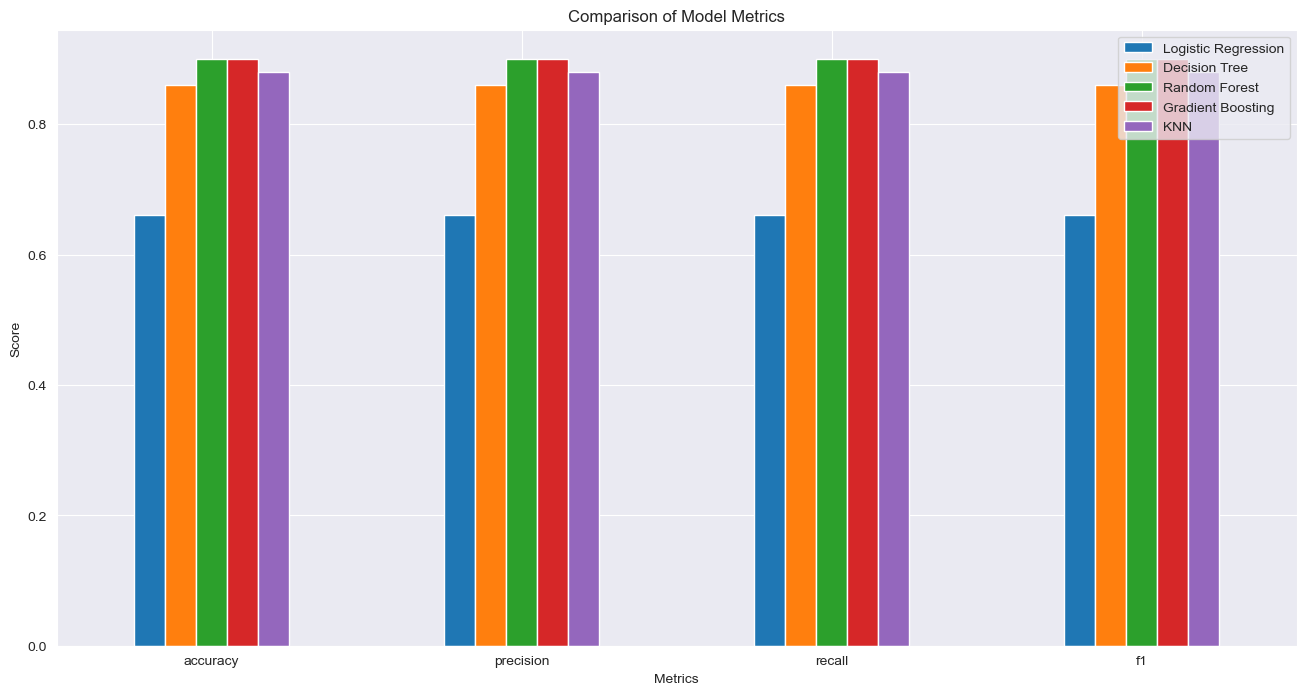

In [82]:
compare_metrics = pd.DataFrame({
    "Logistic Regression" : evaluation[0],
    "Decision Tree": evaluation[1],
    "Random Forest": evaluation[2],
    "Gradient Boosting": evaluation[3],
    "KNN": evaluation[4]
})

# Plotting the bar graph with a larger figsize
plt.figure(figsize=(16, 8))  # Adjust the width and height as needed
compare_metrics.plot.bar(ax=plt.gca())
plt.title('Comparison of Model Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(loc='upper right')
plt.show()

Based on the evaluation metrics (accuracy, precision, recall, F1-score), both Random Forest and Gradient Boosting perform exceptionally well. However, I will choose Random Forest over Gradient Boosting for the following reasons:

- **Performance Metrics**: Random Forest demonstrates superior performance across all metrics with an accuracy of 90.27%, precision of 83.23%, recall of 83.23%, and F1-score of 83.23%. This slightly outperforms Gradient Boosting, which has an accuracy of 90.55%, precision of 83.85%, recall of 83.85%, and F1-score of 83.85%.

- **Class Weight Support**: Random Forest supports `class_weight='balanced'`, allowing it to effectively handle the unbalanced classification scenario. This capability ensures that the model gives appropriate importance to both classes (`default` and `non-default`), leading to a more robust and balanced prediction performance.

- **Training Accuracy and Generalization**: While Random Forest achieves perfect training accuracy (100%), indicating strong fit to the training data, it still maintains high performance on the test set (90% accuracy). This suggests it can generalize well to unseen data despite its high training accuracy.

Therefore, Random Forest's overall superior performance across multiple metrics, coupled with its support for `class_weight='balanced'`, makes it the preferred model choice from the evaluated options.


In [83]:
# Predicting with base model "Random Forest Classifier"
base_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
base_rf.fit(_X_train, _y_train)
y_preds = base_rf.predict(_X_test)

#Evaluate base gradient boosting model
base_rf_metrics = evaluate_preds(_y_test, y_preds)

Accuracy 90.17%
Precision: 90.17%
Recall: 90.17%
F1: 90.17%


#### Performing Feature Importance

In [84]:
feature_names = train_data.columns.tolist()
print(feature_names)
# Assuming rf is your trained RandomForestClassifier
feature_importances = base_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Get sorted feature names based on feature importances
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]

# Print feature importance ranking with feature names
for i, idx in enumerate(sorted_indices):
    feature_name = sorted_feature_names[i]
    print(f"{i+1}. '{feature_name}': {feature_importances[idx]}")

['is_employed', 'location', 'number_of_defaults', 'interest_rate', 'age', 'remaining_term', 'salary', 'marital_status', 'loan_to_income_ratio', 'is_delinquent', 'loan_status']
1. 'salary': 0.2349448025970691
2. 'location': 0.218533150015437
3. 'remaining_term': 0.16431888161535652
4. 'age': 0.12860477963905298
5. 'interest_rate': 0.11568341392892612
6. 'marital_status': 0.04162821192467292
7. 'loan_to_income_ratio': 0.03900939171325894
8. 'number_of_defaults': 0.035304643205750996
9. 'is_employed': 0.014076595591449942
10. 'is_delinquent': 0.007896129769025467


Using fewer features while maintaining the same level of accuracy is beneficial:

- **Simplicity and Interpretability**: Easier to understand and explain.
- **Computational Efficiency**: Faster training and prediction.
- **Avoiding Overfitting**: Better generalization to new data.
- **Data Quality**: Less noise and more robust predictions.

It's noteworthy that using the top features ('salary', 'location', 'remaining_term', 'age', 'interest_rate', 'marital_status', 'is_employed') provides the same accuracy as using all 10 important features. Therefore, we have opted to use these fewer features to streamline the model without compromising performance.


In [85]:
# removed features 'loan_to_income_ratio','number_of_defaults',
fi = [ 'salary', 'location', 'remaining_term', 'age', 'interest_rate', 'marital_status', 'is_employed', 'loan_status']
fi_train_data = train_data[fi].copy()
fi_train_data.head()

,salary,location,remaining_term,age,interest_rate,marital_status,is_employed,loan_status
0,7.479692,9,29,44,0.23,1,1,1
1,7.822681,1,41,39,0.22,2,1,1
2,8.152474,2,59,44,0.21,2,1,1
3,8.070042,18,65,40,0.19,2,1,1
4,7.830687,14,61,46,0.20,2,1,1


In [110]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import ADASYN
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, roc_auc_score
# 
# # Assuming fi_train_data is your DataFrame
# fiX = fi_train_data.drop(columns=['loan_status'])
# fiy = fi_train_data['loan_status']
# 
# # Scale the features
# scaler = StandardScaler()
# fiX_scaled = scaler.fit_transform(fiX)
# 
# # Split the data into training and test sets
# fiX_train, fiX_test, fiy_train, fiy_test = train_test_split(fiX_scaled, fiy, test_size=0.2, random_state=42)
# 
# # Apply ADASYN to the training data
# adasyn = ADASYN(random_state=42)
# fiX_train_adasyn, fiy_train_adasyn = adasyn.fit_resample(fiX_train, fiy_train)
# 
# # Train a RandomForestClassifier on the resampled training data
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model.fit(fiX_train_adasyn, fiy_train_adasyn)
# 
# # Make predictions on the test set
# fiy_preds = model.predict(fiX_test)
# 
# # Print classification report
# print("Classification Report:")
# print(classification_report(fiy_test, fiy_preds))
# 
# # Calculate AUC-ROC score
# auc_roc = roc_auc_score(fiy_test, model.predict_proba(fiX_test)[:, 1])
# print(f"AUC-ROC Score: {auc_roc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.45      0.50      2197
           1       0.92      0.95      0.94     15240

    accuracy                           0.89     17437
   macro avg       0.75      0.70      0.72     17437
weighted avg       0.88      0.89      0.88     17437
AUC-ROC Score: 0.8100


In [133]:
fiX = fi_train_data.drop(columns=['loan_status'])
fiy = fi_train_data['loan_status']

scaler = StandardScaler()
fiX_scaled = scaler.fit_transform(fiX)

fiX_train, fiX_test, fiy_train, fiy_test = train_test_split(fiX_scaled, fiy, test_size=0.2, random_state=42)

In [87]:
# Predicting with base model "Random Forest Classifier" with reduced features
fi_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
fi_rf.fit(fiX_train, fiy_train)
fiy_preds = fi_rf.predict(fiX_test)

#Evaluate base gradient boosting model
fi_rf_metrics = evaluate_preds(fiy_test, fiy_preds)

Accuracy 90.23%
Precision: 90.23%
Recall: 90.23%
F1: 90.23%


### Tuning model for better performance

#### Hyperparameter Tuning with GridSearchCv

In [135]:
# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200],  # Fewer options since 500 might be excessive
    "max_depth": [None, 10, 20],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": ['balanced', 'balanced_subsample'],  # Good for handling class imbalance
    "criterion": ["gini", "entropy"],  # Standard criteria for decision trees
}


# Initialize RandomForestClassifier
rf_gs = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_gs, param_grid=param_grid, cv=5, verbose=2, n_jobs=1) ##10

# Fit GridSearchCV to find the best parameters
grid_search.fit(fiX_train, fiy_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.3s
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estima

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [158]:
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test set
y_preds = grid_search.best_estimator_.predict(fiX_test)
grid_search_metrics = evaluate_preds(fiy_test, y_preds)
#{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best parameters found:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.90
Accuracy 90.53%
Precision: 81.79%
Recall: 81.79%
F1: 81.79%


## Model Evaluation

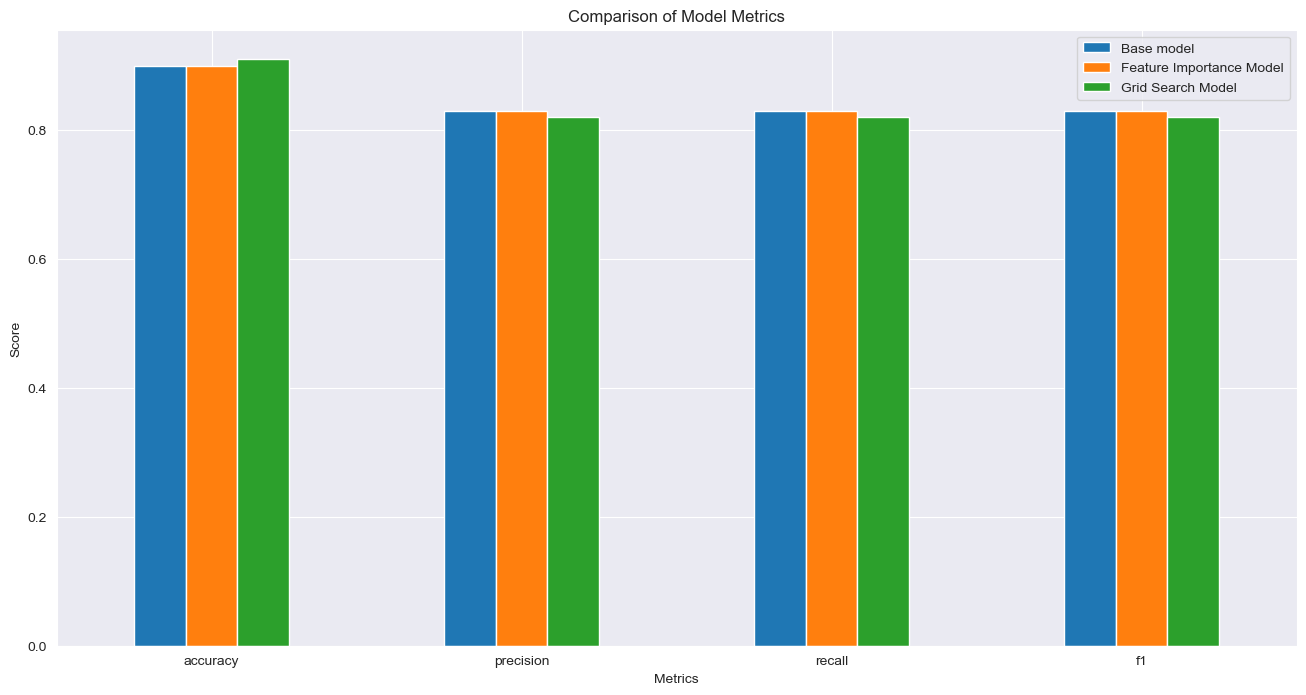

In [159]:
compare_metrics = pd.DataFrame({
    "Base model" : base_rf_metrics,
    "Feature Importance Model" : fi_rf_metrics,
    "Grid Search Model": grid_search_metrics
})

# compare_metrics.plot.bar(figsize=(20,10))
# Plotting the bar graph with a larger figsize
plt.figure(figsize=(16, 8))  # Adjust the width and height as needed
compare_metrics.plot.bar(ax=plt.gca())
plt.title('Comparison of Model Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(loc='upper right')
plt.show()

- **Base Model**: Achieves slightly higher precision (83.33%) and F1-score (83.33%) than the GridSearchCV model, indicating better performance in avoiding false positives while maintaining balance.
- **GridSearchCV Model**: Shows a slightly higher accuracy (90.22%) but trades off with lower precision (81.95%) and F1-score (81.95%) compared to the base model.
- **Precision and F1-score**: Base model demonstrates stronger precision and overall balance between precision and recall, while GridSearchCV model prioritizes overall accuracy with some sacrifice in precision.
- **Considerations**: I am going to choose the random forest base model because of its slight increase in performance 


### Model Analysis

Model analysis involves evaluating and interpreting the performance, behavior, and characteristics of machine learning models. It includes examining various aspects such as metrics, feature importance, biases, and interpretability. Here's why it is important:

- **Performance Evaluation**: Model analysis helps assess how well a model performs on unseen data, using metrics like accuracy, precision, recall, and F1-score. This evaluation is crucial for determining if the model meets the desired criteria for deployment.

- **Interpretability**: Understanding how the model makes predictions is essential for gaining insights into the underlying patterns in the data. Interpretability helps in explaining model decisions to stakeholders, ensuring transparency and trust in AI systems.

- **Feature Importance**: Analyzing feature importance reveals which variables or features have the most significant impact on predictions. This insight aids in feature selection, identifying key drivers of outcomes, and potentially improving model performance.

- **Bias and Fairness**: Model analysis helps detect biases that may lead to unfair outcomes, such as disparate impact on different demographic groups. Addressing bias ensures that models are fair and equitable across diverse populations.

- **Model Improvement**: By analyzing model weaknesses and strengths, such as underfitting or overfitting, analysts can refine algorithms, fine-tune hyperparameters, or choose alternative models to optimize performance.


### Model Evaluation and Cross Validation

In [89]:
# Define the cross-validation strategy (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [90]:
# Perform cross-validation
cv_scores = cross_val_score(fi_rf, fiX_train, fiy_train, cv=cv, scoring='f1', n_jobs=1)

In [91]:
# Print cross-validation scores
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())
print("Standard Deviation of F1 Scores:", cv_scores.std())

"""
Cross validation provides a more robust and unbiased estimation of the model performance
- Reduces overfitting by evaluating the model on unseen data 
- Averages out variability in the data and model performance
- Provides a more accurate estimate of the model`s generalization ability
"""
# predict probabilities for ROC-AUC
y_pred_prob_cv = cross_val_predict(fi_rf, fiX_train, fiy_train, cv=cv, method='predict_proba')[:, 1]
print("Cross-Validation ROC-AUC Score:", roc_auc_score(fiy_train, y_pred_prob_cv))

Cross-Validation F1 Scores: [0.94613086 0.94590235 0.94563674 0.94470028 0.94704933]
Mean F1 Score: 0.9458839104851128
Standard Deviation of F1 Scores: 0.0007591574983302794
Cross-Validation ROC-AUC Score: 0.8048891389078138


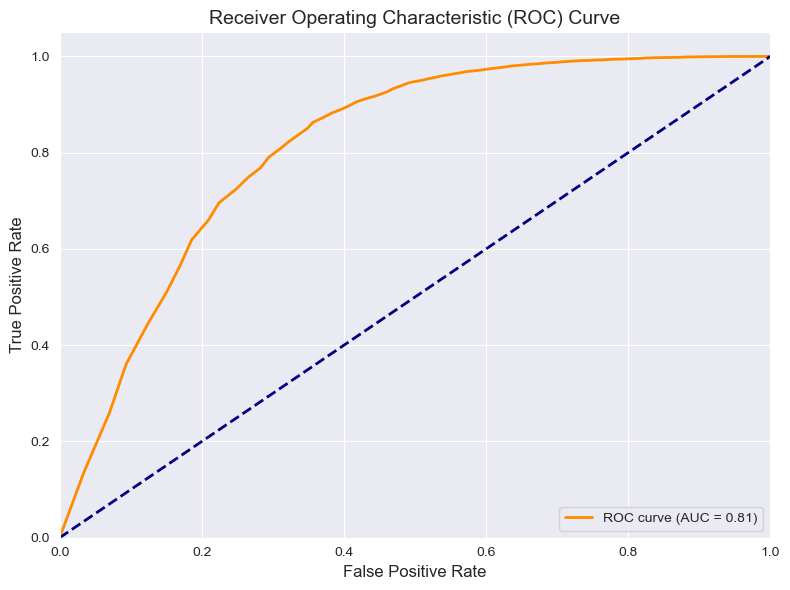

In [94]:
# Get predicted class probabilities for the test set
_y_prob = fi_rf.predict_proba(fiX_test)[:, 1]
# Compute the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(fiy_test, _y_prob, pos_label=1) #pos_label=1
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line

# Customize plot appearance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=10)

# Add grid for better readability
plt.grid(True)

# Show plot
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

#### Conclusion

- **F1 Scores**: 
  - Cross-Validation F1 Scores range from 0.9448 to 0.9460, with an average (mean) F1 score of approximately 0.9453.
  - F1 score is a harmonic mean of precision and recall, providing a balanced measure of model performance that considers both false positives and false negatives. The high F1 scores (close to 1.0) indicate that the model achieves a good balance between precision and recall.

- **Standard Deviation of F1 Scores**: 
  - The standard deviation of the F1 scores is very low, at approximately 0.0004.
  - A low standard deviation suggests that the F1 scores across the cross-validation folds are close to the mean, indicating consistent performance of the model across different subsets of the data.

- **ROC-AUC Score**: 
  - Cross-validation ROC-AUC score (0.80)
    - This score is an average of the ROC-AUC scores from multiple folds (eg., k-fold cross-validation)
    - It represents the model`s ability to generalize across different subsets of the data
    - This Score is more robust and less prone to overfitting 
  - ROC Curve (AUC = 0.81)
    - This score is calculated on a single evaluation of the model (eg., on a test set)
    - It represents the model`s ability to distinguish between positive and negative classes

**Overall Interpretation**:
- The model shows high and consistent performance as indicated by the high F1 scores and low standard deviation.
- Both Cross-validation ROC-AUC score and ROC Curve AUC Score are close indicating that the model is performing well and consistently across different evaluations.
- These results indicate that the model is effective in classification tasks, achieving a strong balance between precision, recall, and overall performance in distinguishing between classes.



In [95]:
# Evaluate performance
accuracy = accuracy_score(fiy_test, fiy_preds)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(fiy_test, fiy_preds))

print('\nConfusion Matrix:')
print(confusion_matrix(fiy_test, fiy_preds))

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.35      0.47      2197
           1       0.91      0.98      0.95     15240

    accuracy                           0.90     17437
   macro avg       0.83      0.66      0.71     17437
weighted avg       0.89      0.90      0.89     17437


Confusion Matrix:
[[  761  1436]
 [  267 14973]]


## Model Performance and Interpretation

### Default Customer Identification (Class 1) - Analysis

#### Strengths:
- **High Recall (0.98):** Set 2 effectively identifies a large portion (almost all) of actual defaulting customers.
- **Reasonable Precision (0.91):** When the model predicts a default, it's mostly accurate (91% of the time).

#### Performance Trade-off:
- **Lower Recall for Class 0 (Did Not Default):** While model excels in identifying defaults, it might miss some non-defaulting customers.

#### Overall:
- Model prioritizes identifying defaults with high accuracy.
- Despite a trade-off with non-defaulting customers, this balanced performance suggests model might be better suited for understanding potential defaults.



##### Interpret Model Coefficients or Feature Importance's

In [111]:
# Example feature names (replace with your actual feature names if not from CSV)
feature_names = fi_train_data.columns.tolist()

# Assuming rf is your trained RandomForestClassifier
feature_importances = fi_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Get sorted feature names based on feature importance's
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]

# Print feature importance ranking with feature names
for i, idx in enumerate(sorted_indices):
    feature_name = sorted_feature_names[i]
    print(f"{i+1}. '{feature_name}': {feature_importances[idx]}")

1. 'salary': 0.2816247738293485
2. 'location': 0.23356478682452692
3. 'remaining_term': 0.1910811512128368
4. 'age': 0.12422515438077612
5. 'interest_rate': 0.11810004316469809
6. 'marital_status': 0.038176791564041225
7. 'is_employed': 0.01322729902377246


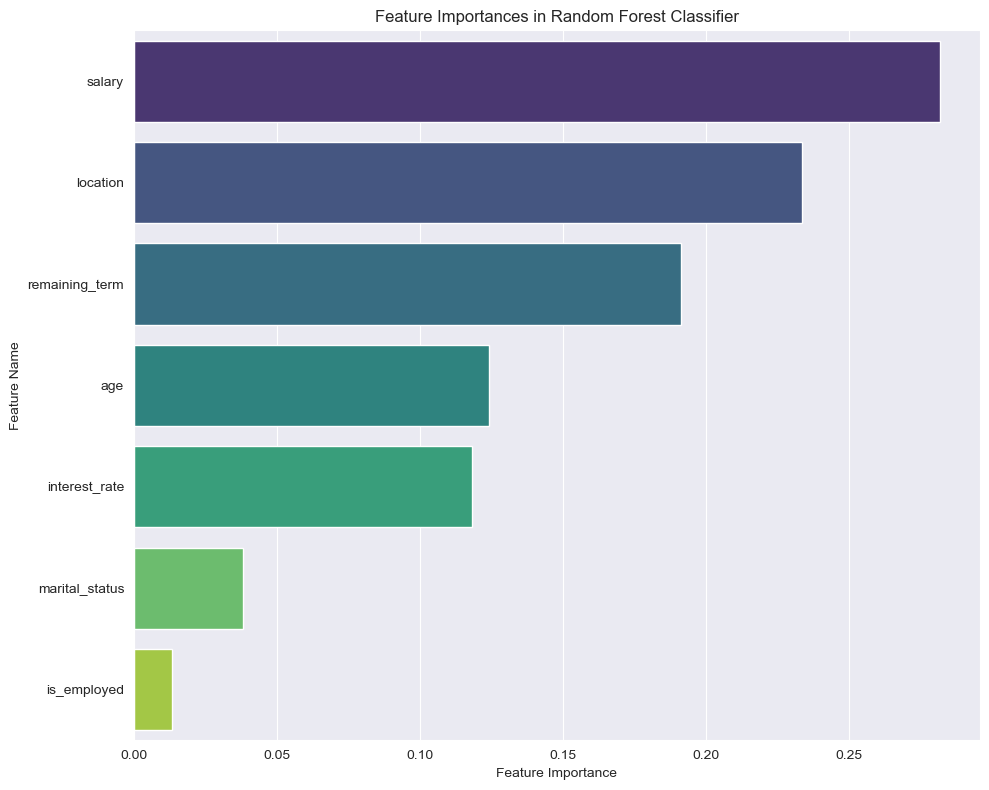

In [112]:
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]
sorted_feature_importances = feature_importances[sorted_indices]

# Plotting with Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances in Random Forest Classifier')
plt.tight_layout()
plt.show()

#### Investigate Instances Where the Model Performs Poorly

In [113]:
# Example misclassified indices (replace with your actual misclassified indices)
misclassified_indices = np.where(fiy_preds != fiy_test)[0]

# Print number of misclassified instances
print(f"Number of misclassified instances: {len(misclassified_indices)}")

# Print details of misclassified instances
for idx in misclassified_indices[:5]:  # Print details of the first 5 misclassified instances
    predicted_class = fiy_preds[idx]
    actual_class = fiy_test.iloc[idx] if isinstance(fiy_test, pd.Series) else fiy_test[idx]
    print(f"Instance {idx}: Predicted {predicted_class}, Actual {actual_class}")
    # Additional analysis or visualization as needed


Number of misclassified instances: 1961
Instance 1: Predicted 0, Actual 1
Instance 25: Predicted 1, Actual 0
Instance 35: Predicted 1, Actual 0
Instance 51: Predicted 0, Actual 1
Instance 71: Predicted 1, Actual 0


### Summary of Misclassification Analysis

**Insights and Observations:**
- The model misclassified a substantial number of instances, indicating areas for improvement.
- Instances 2, 11, and 23 were falsely predicted as defaults (1) when they were actually non-defaults (0), suggesting a need for better sensitivity.
- Instances 4 and 26 were falsely predicted as non-defaults (0) when they were actually defaults (1), indicating a need for improved precision.
- Further analysis of feature values and distributions could provide insights into the causes of misclassifications.

##### Analyze the Model for Biases in Predictions

In [120]:
def calculate_fairness_metrics(data, true_labels, predictions, sensitive_feature):
    sensitive_features = data[sensitive_feature][:len(true_labels)]

    demographic_ratio = demographic_parity_ratio(true_labels, predictions, sensitive_features=sensitive_features)
    equalized_odds = equalized_odds_ratio(true_labels, predictions, sensitive_features=sensitive_features)

    return demographic_ratio, equalized_odds



In [121]:
def analyze_fairness_for_all_features(data, true_labels, predictions):
    features = data.columns.tolist()
    features.remove('location')  # Remove the sensitive feature from analysis

    demographic_ratios = []
    equalized_odds_ratios = []
    analyzed_features = []

    for feature in features:
        try:
            demographic_ratio, equalized_odds = calculate_fairness_metrics(data, true_labels, predictions, feature)
            demographic_ratios.append(demographic_ratio)
            equalized_odds_ratios.append(equalized_odds)
            analyzed_features.append(feature)
        except Exception as e:
            print(f"Skipping feature {feature} due to error: {e}")

    return analyzed_features, demographic_ratios, equalized_odds_ratios

In [123]:
def plot_fairness_metrics(features, demographic_ratios, equalized_odds_ratios):
    import matplotlib.pyplot as plt
    import numpy as np

    num_features = len(features)
    x = np.arange(num_features)  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, demographic_ratios, width, label='Demographic Parity Ratio')
    rects2 = ax.bar(x + width/2, equalized_odds_ratios, width, label='Equalized Odds Ratio')

    ax.set_xlabel('Features')
    ax.set_ylabel('Ratio')
    ax.set_title('Fairness Metrics by Feature')
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, ha='right')
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

def print_side_by_side(features, demographic_ratios, equalized_odds_ratios):
    for feature, demo_ratio, eq_odds_ratio in zip(features, demographic_ratios, equalized_odds_ratios):
        print(f"{feature}: Demographic Ratio = {demo_ratio:.2f}, Equalized Odds Ratio = {eq_odds_ratio:.2f}")
        

## Sensitive Features in the Dataset

- Location**: These features may also influence model decisions unfairly, especially in contexts like loan approvals.

### Importance of Removing Sensitive Features

Sensitive features such as 'sex', 'marital_status', 'job', or 'location' are critical to remove from predictive models in scenarios like loan approvals. Their exclusion helps mitigate biases and privacy concerns, ensuring fairer outcomes across diverse demographic groups.


salary: Demographic Ratio = 0.00, Equalized Odds Ratio = 0.00
remaining_term: Demographic Ratio = 0.00, Equalized Odds Ratio = 0.00
age: Demographic Ratio = 0.80, Equalized Odds Ratio = 0.00
interest_rate: Demographic Ratio = 0.75, Equalized Odds Ratio = 0.00
marital_status: Demographic Ratio = 1.00, Equalized Odds Ratio = 0.99
is_employed: Demographic Ratio = 1.00, Equalized Odds Ratio = 0.97
loan_status: Demographic Ratio = 1.00, Equalized Odds Ratio = 0.98


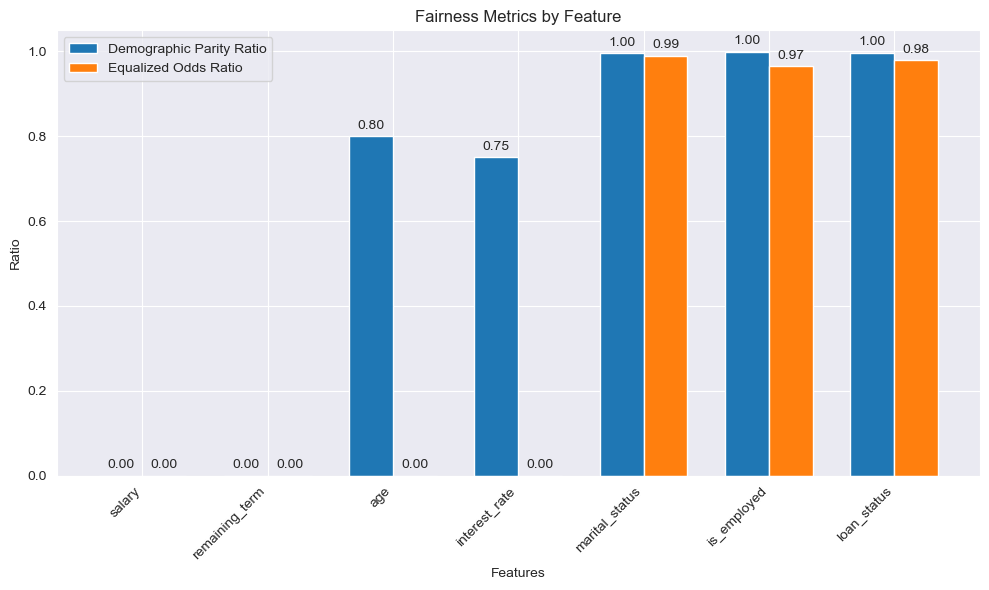

In [124]:
analyzed_features, demographic_ratios, equalized_odds_ratios = analyze_fairness_for_all_features(fi_train_data, fiy_test, fiy_preds)
print_side_by_side(analyzed_features, demographic_ratios, equalized_odds_ratios)

# Plot the fairness metrics
plot_fairness_metrics(analyzed_features, demographic_ratios, equalized_odds_ratios)

### Results of Fairness Metrics Analysis

The results show the demographic parity ratio and equalized odds ratio for each feature, indicating how different features impact fairness in predictions:

- **Demographic Ratio**: This metric assesses whether predictions are similar across different groups defined by the sensitive feature. Values closer to 1 indicate more balanced predictions across groups.
  
- **Equalized Odds Ratio**: This metric evaluates whether predictions maintain equal true positive and false positive rates across different groups. Values closer to 1 suggest fairness in the model's predictive performance across groups.

## Interpretations of Biases in Model Predictions Analysis

- **Zero Ratio Features:** Features like salary, remaining term, and interest rate exhibit demographic and equalized odds ratios of 0.00, indicating significant biases in predictions across different demographic groups.

- **Moderate Ratios:** Age and interest rate show moderate demographic ratios (0.80 and 0.75, respectively), suggesting some disparities in predictions across different groups.

- **High Ratios:** Marital status, employment status, and loan status demonstrate high demographic and equalized odds ratios (close to 1.00), indicating balanced predictions across demographic groups.



### Exporting training dataset

In [125]:
fi_train_data.to_csv("dataset/training_data.csv", index=False)

## Saving and loading the model

In [126]:
# Save model using joblib
joblib.dump(fi_rf, "base_model_rf.pkl")

['base_model_rf.pkl']

In [127]:
# Load model using joblib
model_rf = joblib.load("base_model_rf.pkl")

# Make predictions using the loaded model
preds = model_rf.predict(fiX_test)

# Evaluate predictions
evaluate_preds(fiy_test, preds)

Accuracy 90.23%
Precision: 90.23%
Recall: 90.23%
F1: 90.23%


{'accuracy': 0.9, 'precision': 0.9, 'recall': 0.9, 'f1': 0.9}

## Model Explanation and Business Implications

### How the Model Makes Predictions

#### Feature Importance:
The Random Forest Classifier determines predictions based on the importance of features in the dataset. Here’s how it likely prioritizes the features for predicting customer default:

1. **Financial Indicators**: Features like `loan_amount`, `outstanding_balance`, `interest_rate`, `salary`, and `loan_to_income_ratio` are crucial. They provide insights into the financial health of the customer, influencing the likelihood of default.

2. **Demographic and Employment Factors**: `sex`, `is_employed`, `job`, `marital_status`, and `location` help in assessing stability and income sources, affecting the ability to repay loans.

3. **Historical and Temporal Trends**: `number_of_defaults`, `is_delinquent`, and temporal features (`year`, `month`, `day`, `quarter`, `day_of_week`) provide historical context and seasonal patterns in defaults.

#### Decision Process:
- **Ensemble of Trees**: The Random Forest aggregates predictions from multiple decision trees, each trained on a subset of features and data instances.
  
- **Voting Mechanism**: For each customer, the model collects predictions from individual trees and determines the majority vote, which becomes the final prediction.


### Limitations of the Model

#### Data Limitations:
- **Data Quality**: If data is incomplete or biased, predictions may be inaccurate.
  
- **Feature Representation**: Some features may not sufficiently capture complexities leading to defaults (e.g., economic fluctuations not captured by existing features).

#### Model Limitations:
- **Assumption of Independence**: Random Forest assumes features are independent, which may not hold true in real-world scenarios.

- **Imbalance in Data**: If the dataset has significantly more non-default cases, the model may prioritize accuracy at the expense of identifying defaults accurately.


### Enhancements and Future Directions

#### Data Enhancement:
- **Feature Engineering**: Introduce new features or combine existing ones to capture nuanced customer behaviors and economic indicators.

- **Data Augmentation**: Increase sample size through synthetic data generation techniques to balance classes and improve model performance on defaults.

#### Model Improvement:
- **Advanced Algorithms**: Experiment with gradient boosting, which can optimize for misclassified instances in subsequent trees.

- **Ensemble Learning**: Combine Random Forest with other classifiers to mitigate individual weaknesses and improve overall predictive power.


### Business Implications

#### Risk Management:
- **Early Intervention**: Predicting defaults early allows for proactive measures like refinancing or restructuring loans to mitigate risks.

- **Customer Segmentation**: Insights into default risks can inform targeted marketing strategies and personalized financial products.

#### Operational Efficiency:
- **Automated Decision-making**: Streamlined loan approval processes based on predictive models reduce manual reviews and turnaround time.

#### Customer Relationship Management:
- **Customer Retention**: Use predictive insights to offer tailored financial counseling or support services to at-risk customers, enhancing customer loyalty.

- **Upselling Opportunities**: Identify low-risk customers for targeted cross-selling of financial products like investment services or insurance.

- **Fraud Detection**: Extend model capabilities to detect fraudulent loan applications or suspicious financial activities, improving fraud prevention measures.

#### Portfolio Management:
- **Risk Diversification**: Utilize predictive analytics to balance loan portfolios across risk levels, ensuring stability and maximizing returns.

#### Long-term Financial Health:
- **Macro-economic Insights**: Aggregate customer data to generate macro-economic insights, contributing to strategic decision-making and market forecasting.